## Introduction to Pandas


* Data: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## Column Descriptions:

- **id**: Unique id for each patient
- **age**: Age of the patient in years
- **origin**: Place of study
- **sex**: Male/Female
- **cp**: Chest pain type
  - Values: [typical angina, atypical angina, non-anginal, asymptomatic]
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)
- **chol**: Serum cholesterol in mg/dl
- **fbs**: If fasting blood sugar > 120 mg/dl
- **restecg**: Resting electrocardiographic results
  - Values: [normal, stt abnormality, lv hypertrophy]
- **thalach**: Maximum heart rate achieved
- **exang**: Exercise-induced angina (True/False)
- **oldpeak**: ST depression induced by exercise relative to rest
- **slope**: The slope of the peak exercise ST segment
- **ca**: Number of major vessels (0-3) colored by fluoroscopy
- **thal**: 
  - Values: [normal, fixed defect, reversible defect]
- **num**: The predicted attribute


In [1]:
import pandas as pd

### 1. Exploring the dataset

First of all, we need to load data from a CSV file. There are several ways to do this in pandas, and we'll look at different approaches:

In [14]:
# upload data
heart_data = pd.read_csv("data/heart_disease_uci.csv")
# make first column as index
heart_data.set_index("id", inplace=True)

In [ ]:
heart_data

age     sex        dataset               cp  trestbps   chol    fbs  \
id                                                                         
1     63    Male      Cleveland   typical angina     145.0  233.0   True   
2     67    Male      Cleveland     asymptomatic     160.0  286.0  False   
3     67    Male      Cleveland     asymptomatic     120.0  229.0  False   
4     37    Male      Cleveland      non-anginal     130.0  250.0  False   
5     41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...     ...            ...              ...       ...    ...    ...   
916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
id                                                                
1      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
2      lv hypertrophy   108.0   True      1.5         flat  3.0   
3      lv hypertrophy   129.0   True      2.6         flat  2.0   
4              normal   187.0  False      3.5  downsloping  0.0   
5      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
916  st-t abnormality   154.0  False      0.0          NaN  NaN   
917  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
918  st-t abnormality   100.0  False      0.0          NaN  NaN   
919    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
920    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  num  
id                           
1         fixed defect    0  
2               normal    2  
3    reversable defect    1  
4               normal    0  
5               normal    0  
..                 ...  ...  
916                NaN    1  
917                NaN    0  
918       fixed defect    2  
919                NaN    0  
920                NaN    1  

[920 rows x 15 columns]

This code loads the data and sets the “id” column as an index. The inplace=True parameter means that the changes will be applied directly to our DataFrame, without the need to assign the result to a new variable.

Alternatively, we can do the same thing with new parameter `index_col`:

In [ ]:
# alternatively we can set index_col="id"
heart_data_2 = pd.read_csv("heart_disease_uci.csv", index_col="id")

In [ ]:
# or set index by the num of column
heart_data_3 = pd.read_csv("heart_disease_uci.csv", index_col=0)

In [ ]:
heart_data_3

age     sex        dataset               cp  trestbps   chol    fbs  \
id                                                                         
1     63    Male      Cleveland   typical angina     145.0  233.0   True   
2     67    Male      Cleveland     asymptomatic     160.0  286.0  False   
3     67    Male      Cleveland     asymptomatic     120.0  229.0  False   
4     37    Male      Cleveland      non-anginal     130.0  250.0  False   
5     41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...     ...            ...              ...       ...    ...    ...   
916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
id                                                                
1      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
2      lv hypertrophy   108.0   True      1.5         flat  3.0   
3      lv hypertrophy   129.0   True      2.6         flat  2.0   
4              normal   187.0  False      3.5  downsloping  0.0   
5      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
916  st-t abnormality   154.0  False      0.0          NaN  NaN   
917  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
918  st-t abnormality   100.0  False      0.0          NaN  NaN   
919    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
920    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  num  
id                           
1         fixed defect    0  
2               normal    2  
3    reversable defect    1  
4               normal    0  
5               normal    0  
..                 ...  ...  
916                NaN    1  
917                NaN    0  
918       fixed defect    2  
919                NaN    0  
920                NaN    1  

[920 rows x 15 columns]

After downloading, it's important to familiarize yourself with our data. Pandas provides many useful methods for this:

In [ ]:
heart_data.head(3) # show first 3 rows

age   sex    dataset              cp  trestbps   chol    fbs  \
id                                                                 
1    63  Male  Cleveland  typical angina     145.0  233.0   True   
2    67  Male  Cleveland    asymptomatic     160.0  286.0  False   
3    67  Male  Cleveland    asymptomatic     120.0  229.0  False   

           restecg  thalch  exang  oldpeak        slope   ca  \
id                                                             
1   lv hypertrophy   150.0  False      2.3  downsloping  0.0   
2   lv hypertrophy   108.0   True      1.5         flat  3.0   
3   lv hypertrophy   129.0   True      2.6         flat  2.0   

                 thal  num  
id                          
1        fixed defect    0  
2              normal    2  
3   reversable defect    1

In [ ]:
# Show the last 5 rows
heart_data.tail(5)

age     sex        dataset               cp  trestbps   chol    fbs  \
id                                                                         
916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak slope  ca          thal  num  
id                                                                          
916  st-t abnormality   154.0  False      0.0   NaN NaN           NaN    1  
917  st-t abnormality     NaN    NaN      NaN   NaN NaN           NaN    0  
918  st-t abnormality   100.0  False      0.0   NaN NaN  fixed defect    2  
919    lv hypertrophy     NaN    NaN      NaN   NaN NaN           NaN    0  
920    lv hypertrophy    93.0   True      0.0   NaN NaN           NaN    1

These methods allow you to quickly view the data structure and make sure that it is loaded correctly.

In [15]:
# Show the columns
print(heart_data.columns) # name of columns

Index(['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [ ]:
# Show the rows index
print(heart_data.index) # index of rows

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920],
      dtype='int64', name='id', length=920)


In [ ]:
# Show the shape of the data
print(heart_data.shape[0]) # number of rows
print(heart_data.shape[1]) # number of columns

920
15


In [ ]:
# Show the data types
print(heart_data.dtypes)

age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object


The `info()` method provides a comprehensive overview of the dataset:

In [ ]:
# Information about the data
print(heart_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 920 entries, 1 to 920
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 115.0+ KB
None


Pandas has built-in tools for statistical analysis:

In [ ]:
# Show summury statistics for the dataset
heart_data.describe()

age    trestbps        chol      thalch     oldpeak          ca  \
count  920.000000  861.000000  890.000000  865.000000  858.000000  309.000000   
mean    53.510870  132.132404  199.130337  137.545665    0.878788    0.676375   
std      9.424685   19.066070  110.780810   25.926276    1.091226    0.935653   
min     28.000000    0.000000    0.000000   60.000000   -2.600000    0.000000   
25%     47.000000  120.000000  175.000000  120.000000    0.000000    0.000000   
50%     54.000000  130.000000  223.000000  140.000000    0.500000    0.000000   
75%     60.000000  140.000000  268.000000  157.000000    1.500000    1.000000   
max     77.000000  200.000000  603.000000  202.000000    6.200000    3.000000   

              num  
count  920.000000  
mean     0.995652  
std      1.142693  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      4.000000

We can also analyze individual columns:

In [ ]:
# choose columns to describe
print(heart_data[["thalch", "age", "ca"]].describe())

           thalch         age          ca
count  865.000000  920.000000  309.000000
mean   137.545665   53.510870    0.676375
std     25.926276    9.424685    0.935653
min     60.000000   28.000000    0.000000
25%    120.000000   47.000000    0.000000
50%    140.000000   54.000000    0.000000
75%    157.000000   60.000000    1.000000
max    202.000000   77.000000    3.000000


An important stage of the analysis is the verification and processing of missing values:

In [ ]:
# Check the NaN values in the dataset
print(heart_data.isna().sum()) # number of NaN values in each column

age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


Visualization helps to better understand the distribution of missing values:

<Axes: >

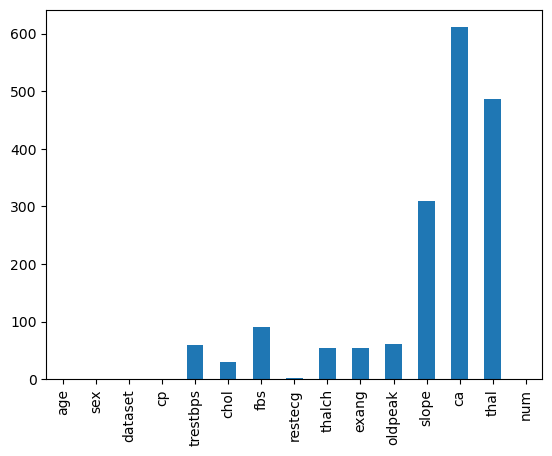

In [ ]:
# plot the NaN values
heart_data.isna().sum().plot(kind="bar")

If necessary, we can delete rows with missing values:

In [ ]:
# Remove rows with NaN values
heart_data.dropna(inplace=True)

In [ ]:
# check NaN values again
print(heart_data.isna().sum())

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


For individual columns, we can calculate the main statistical values:

In [ ]:
# Simple statistics on columns
print(heart_data["age"].mean())
print(heart_data["chol"].max())
print(heart_data["chol"].min())
print(heart_data["oldpeak"].sum())

54.52173913043478
564.0
100.0
316.5


####  Practice Tasks: Exploring the Dataset

Now it's time to practice what you've learned! Complete the following tasks to reinforce your understanding of pandas data exploration methods.

**Dataset Information:**
- We'll be working with the heart disease dataset
- Make sure you have loaded the data as `heart_data` as shown in the examples above

##### Task 1: Basic Data Exploration
Complete the following sub-tasks to explore the heart disease dataset:

**a)** Display the first 7 rows of the dataset
**b)** Display the last 3 rows of the dataset
**c)** Show the column names of the dataset
**d)** Display the total number of rows and columns separately
**e)** Show the data types of all columns

In [ ]:
# Task 1: Write your code here

# a) Display the first 7 rows
# Your code here

# b) Display the last 3 rows  
# Your code here

# c) Show the column names
# Your code here

# d) Display the total number of rows and columns separately
# Your code here

# e) Show the data types of all columns
# Your code here

##### Task 2: Statistical Analysis
Use pandas methods to answer the following questions:

**a)** Get a comprehensive overview of the dataset using the appropriate pandas method
**b)** Generate summary statistics for all numerical columns
**c)** Generate summary statistics for only the 'age', 'trestbps', and 'chol' columns
**d)** Find the mean age of patients in the dataset
**e)** Find the maximum cholesterol level ('chol') in the dataset
**f)** Find the minimum resting blood pressure ('trestbps') in the dataset

In [ ]:
# Task 2: Write your code here

# a) Get comprehensive overview of the dataset
# Your code here

# b) Generate summary statistics for all numerical columns
# Your code here

# c) Generate summary statistics for specific columns
# Your code here

# d) Find the mean age
# Your code here

# e) Find the maximum cholesterol level
# Your code here

# f) Find the minimum resting blood pressure
# Your code here

##### Task 3: Missing Values Analysis
Analyze and handle missing values in the dataset:

**a)** Check for missing values in each column and display the count
**b)** Create a bar plot to visualize missing values per column
**c)** Calculate the total number of missing values in the entire dataset
**d)** Calculate the percentage of missing values for each column
**e)** Check if there are any rows with missing values and count them

In [ ]:
# Task 3: Write your code here

# a) Check for missing values in each column
# Your code here

# b) Create a bar plot to visualize missing values
# Your code here

# c) Calculate total missing values in entire dataset
# Your code here

# d) Calculate percentage of missing values for each column
# Your code here

# e) Check for rows with missing values
# Your code here

---

#### 💡 Solutions: Exploring the dataset

Below are the solutions to the practice tasks. Try to solve them yourself first before looking at the answers!

##### Solution 1: Basic Data Exploration

In [ ]:
# Solution 1: Basic Data Exploration

# a) Display the first 7 rows
print("First 7 rows:")
print(heart_data.head(7))
print("\n" + "="*50 + "\n")

# b) Display the last 3 rows
print("Last 3 rows:")
print(heart_data.tail(3))
print("\n" + "="*50 + "\n")

# c) Show the column names
print("Column names:")
print(heart_data.columns.tolist())
print("\n" + "="*50 + "\n")

# d) Display the total number of rows and columns separately
print(f"Number of rows: {heart_data.shape[0]}")
print(f"Number of columns: {heart_data.shape[1]}")
print("\n" + "="*50 + "\n")

# e) Show the data types of all columns
print("Data types:")
print(heart_data.dtypes)

##### Solution 2: Statistical Analysis

In [ ]:
# Solution 2: Statistical Analysis

# a) Get comprehensive overview of the dataset
print("Dataset Overview:")
print(heart_data.info())
print("\n" + "="*50 + "\n")

# b) Generate summary statistics for all numerical columns
print("Summary statistics for all numerical columns:")
print(heart_data.describe())
print("\n" + "="*50 + "\n")

# c) Generate summary statistics for specific columns
print("Summary statistics for age, trestbps, and chol:")
print(heart_data[['age', 'trestbps', 'chol']].describe())
print("\n" + "="*50 + "\n")

# d) Find the mean age
mean_age = heart_data['age'].mean()
print(f"Mean age: {mean_age:.2f} years")

# e) Find the maximum cholesterol level
max_chol = heart_data['chol'].max()
print(f"Maximum cholesterol level: {max_chol}")

# f) Find the minimum resting blood pressure
min_trestbps = heart_data['trestbps'].min()
print(f"Minimum resting blood pressure: {min_trestbps}")

##### Solution 3: Missing Values Analysis

In [ ]:
# Solution 3: Missing Values Analysis

# a) Check for missing values in each column
print("Missing values per column:")
missing_values = heart_data.isna().sum()
print(missing_values)
print("\n" + "="*50 + "\n")

# b) Create a bar plot to visualize missing values
print("Bar plot of missing values:")
import matplotlib.pyplot as plt
missing_values.plot(kind='bar', figsize=(12, 6))
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print("\n" + "="*50 + "\n")

# c) Calculate total missing values in entire dataset
total_missing = heart_data.isna().sum().sum()
print(f"Total missing values in dataset: {total_missing}")

# d) Calculate percentage of missing values for each column
total_rows = len(heart_data)
missing_percentage = (heart_data.isna().sum() / total_rows) * 100
print("Percentage of missing values per column:")
print(missing_percentage.round(2))
print("\n" + "="*50 + "\n")

# e) Check for rows with missing values
rows_with_missing = heart_data.isna().any(axis=1).sum()
print(f"Number of rows with at least one missing value: {rows_with_missing}")

### 2. Column manipulations

**Rename columns**.
* Sometimes we need to change column names for better readability or to meet certain standards:

In [ ]:
# Rename columns
heart_data.rename(columns={"age": "AGE"}, inplace=True)
print(heart_data.columns)

Index(['AGE', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


The `rename()` method also allows you to change column names using a dictionary, where the keys are the current names and the values are the new names. The `inplace=True` parameter applies the changes directly to the `DataFrame`.

In [ ]:
# Show the columns
heart_data.columns

Index(['AGE', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

There are several ways to change the order of columns in pandas. The easiest is to use a list with the desired order:

In [ ]:
# Reorder columns
heart_data_reordered = heart_data[['ca', 'thal', 'num', 'AGE', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope']]

Alternatively, you can use the `reindex()` method, which gives you more options for managing indexing.

In [ ]:
# alternative way to reorder columns
heart_data_reordered_0 = heart_data.reindex(columns=["col1", "col2", "col3"])

In [ ]:
heart_data_reordered.columns

Index(['ca', 'thal', 'num', 'AGE', 'sex', 'dataset', 'cp', 'trestbps', 'chol',
       'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope'],
      dtype='object')

To delete unnecessary columns, use the `drop()` method

In [ ]:
# Drop columns
heart_data.drop(columns=["chol"], inplace=True)

Pandas provides flexible options for creating new columns. Let's look at different approaches:

* Create a column with a specific value

In [ ]:
# Create a new column
heart_data["new_column"] = 0

In [ ]:
heart_data

AGE     sex        dataset               cp  trestbps    fbs  \
id                                                                  
1     63    Male      Cleveland   typical angina     145.0   True   
2     67    Male      Cleveland     asymptomatic     160.0  False   
3     67    Male      Cleveland     asymptomatic     120.0  False   
4     37    Male      Cleveland      non-anginal     130.0  False   
5     41  Female      Cleveland  atypical angina     130.0  False   
..   ...     ...            ...              ...       ...    ...   
300   68    Male      Cleveland     asymptomatic     144.0   True   
301   57    Male      Cleveland     asymptomatic     130.0  False   
302   57  Female      Cleveland  atypical angina     130.0  False   
509   47    Male        Hungary     asymptomatic     150.0  False   
749   56    Male  VA Long Beach     asymptomatic     120.0  False   

            restecg  thalch  exang  oldpeak        slope   ca  \
id                                                              
1    lv hypertrophy   150.0  False      2.3  downsloping  0.0   
2    lv hypertrophy   108.0   True      1.5         flat  3.0   
3    lv hypertrophy   129.0   True      2.6         flat  2.0   
4            normal   187.0  False      3.5  downsloping  0.0   
5    lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..              ...     ...    ...      ...          ...  ...   
300          normal   141.0  False      3.4         flat  2.0   
301          normal   115.0   True      1.2         flat  1.0   
302  lv hypertrophy   174.0  False      0.0         flat  1.0   
509          normal    98.0   True      1.5         flat  0.0   
749          normal   120.0   True      1.5         flat  0.0   

                  thal  num  new_column  
id                                       
1         fixed defect    0           0  
2               normal    2           0  
3    reversable defect    1           0  
4               normal    0           0  
5               normal    0           0  
..                 ...  ...         ...  
300  reversable defect    2           0  
301  reversable defect    3           0  
302             normal    1           0  
509  reversable defect    1           0  
749  reversable defect    1           0  

[299 rows x 15 columns]

* Create columns with random data

In [ ]:
# Create a new column and assign a value to it
# create two columns with random height and weight
import numpy as np
heart_data["height"] = np.random.randint(150, 200, heart_data.shape[0])
heart_data["weight"] = np.random.randint(50, 150, heart_data.shape[0])

Here we use numpy to generate random values for height (150-200 cm) and weight (50-150 kg). The `heart_data.shape[0]` parameter indicates that we need to generate as many values as there are rows in our `DataFrame`.

* Create a column based on calculations
We can create new columns by using math operations on other columns. For example, let's calculate the body mass index (BMI) and record it in a new column:

In [ ]:
# Calculate BMI index on columns height and weight
heart_data["bmi"] = heart_data["weight"] / (heart_data["height"] / 100) ** 2

In [ ]:
heart_data

AGE     sex        dataset               cp  trestbps    fbs  \
id                                                                  
1     63    Male      Cleveland   typical angina     145.0   True   
2     67    Male      Cleveland     asymptomatic     160.0  False   
3     67    Male      Cleveland     asymptomatic     120.0  False   
4     37    Male      Cleveland      non-anginal     130.0  False   
5     41  Female      Cleveland  atypical angina     130.0  False   
..   ...     ...            ...              ...       ...    ...   
300   68    Male      Cleveland     asymptomatic     144.0   True   
301   57    Male      Cleveland     asymptomatic     130.0  False   
302   57  Female      Cleveland  atypical angina     130.0  False   
509   47    Male        Hungary     asymptomatic     150.0  False   
749   56    Male  VA Long Beach     asymptomatic     120.0  False   

            restecg  thalch  exang  oldpeak        slope   ca  \
id                                                              
1    lv hypertrophy   150.0  False      2.3  downsloping  0.0   
2    lv hypertrophy   108.0   True      1.5         flat  3.0   
3    lv hypertrophy   129.0   True      2.6         flat  2.0   
4            normal   187.0  False      3.5  downsloping  0.0   
5    lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..              ...     ...    ...      ...          ...  ...   
300          normal   141.0  False      3.4         flat  2.0   
301          normal   115.0   True      1.2         flat  1.0   
302  lv hypertrophy   174.0  False      0.0         flat  1.0   
509          normal    98.0   True      1.5         flat  0.0   
749          normal   120.0   True      1.5         flat  0.0   

                  thal  num  new_column  height  weight        bmi  
id                                                                  
1         fixed defect    0           0     173      98  32.744161  
2               normal    2           0     186      61  17.632096  
3    reversable defect    1           0     188      92  26.029878  
4               normal    0           0     173     106  35.417154  
5               normal    0           0     152     120  51.939058  
..                 ...  ...         ...     ...     ...        ...  
300  reversable defect    2           0     156      60  24.654832  
301  reversable defect    3           0     152      68  29.432133  
302             normal    1           0     171      85  29.068773  
509  reversable defect    1           0     150     148  65.777778  
749  reversable defect    1           0     175      70  22.857143  

[299 rows x 18 columns]

Sometimes you need to change the data type in a column to work with it correctly:

In [ ]:
# Convert the 'sex' column to a categorical type
heart_data["sex"] = heart_data["sex"].astype("category")

# Convert 'age' to string
heart_data["AGE"] = heart_data["AGE"].astype(str)

Changing data types can be useful for:

* Optimizing memory (categorical data takes up less space)
* Enabling certain analysis functions to work correctly
* Displaying data in the desired format

#### Practice Tasks: Column Manipulations

Now let's practice column manipulation techniques! Complete the following 3 tasks to master pandas column operations.

**Dataset Information:**
- Continue working with the heart disease dataset loaded as `heart_data`
- We'll practice renaming, reordering, creating, and modifying columns

##### Task 1: Column Renaming and Reordering
Practice renaming and reordering columns in the dataset:

**a)** Rename the following columns:
   - 'trestbps' → 'resting_bp'
   - 'thalch' → 'max_heart_rate'
   - 'cp' → 'chest_pain_type'

**b)** Display the updated column names to verify the changes

**c)** Create a new DataFrame with columns in this specific order:
   ['AGE', 'sex', 'chest_pain_type', 'resting_bp', 'max_heart_rate', 'num']
   (use only these 6 columns from the dataset)

In [ ]:
# Task 1: Write your code here

# a) Rename the columns
# Your code here

# b) Display the updated column names
# Your code here

# c) Create new DataFrame with specific column order
# Your code here

##### Task 2: Creating and Modifying Columns
Practice creating new columns and modifying existing ones:

**a)** Create a new column called 'age_category' that categorizes patients based on age:
   - 'Young' for age < 45
   - 'Middle-aged' for age 45-65  
   - 'Senior' for age > 65

**b)** Create a new column called 'bp_status' based on resting blood pressure:
   - 'Normal' for resting_bp < 120
   - 'Elevated' for resting_bp 120-139
   - 'High' for resting_bp >= 140

**c)** Create a new column called 'heart_rate_zone' based on max_heart_rate:
   - 'Low' for max_heart_rate < 100
   - 'Normal' for max_heart_rate 100-180
   - 'High' for max_heart_rate > 180

In [ ]:
# Task 2: Write your code here

# a) Create age_category column
# Your code here

# b) Create bp_status column  
# Your code here

# c) Create heart_rate_zone column
# Your code here

# Display the first few rows to see the new columns
# Your code here

##### Task 3: Data Type Conversion and Column Operations
Practice data type conversion and column cleanup:

**a)** Convert the following columns to appropriate data types:
   - 'age_category' → categorical
   - 'bp_status' → categorical  
   - 'chest_pain_type' → categorical
   - 'AGE' → back to integer (it was converted to string earlier)

**b)** Drop the following columns from the dataset:
   - 'new_column' (if it exists)
   - 'height' (if it exists)
   - 'weight' (if it exists)
   - 'bmi' (if it exists)

**c)** Display the data types of all columns and the shape of the cleaned dataset

In [ ]:
# Task 3: Write your code here

# a) Convert data types
# Your code here

# b) Drop unnecessary columns (use try-except to handle missing columns)
# Your code here

# c) Display data types and shape
# Your code here

---

#### 💡 Solutions: Column Manipulations

Below are the solutions to the column manipulation tasks. Try to solve them yourself first!

##### Solution 1: Column Renaming and Reordering

In [ ]:
# Solution 1: Column Renaming and Reordering

# a) Rename the columns
heart_data.rename(columns={
    'trestbps': 'resting_bp',
    'thalch': 'max_heart_rate', 
    'cp': 'chest_pain_type'
}, inplace=True)

print("Columns renamed successfully!")
print("\n" + "="*50 + "\n")

# b) Display the updated column names
print("Updated column names:")
print(heart_data.columns.tolist())
print("\n" + "="*50 + "\n")

# c) Create new DataFrame with specific column order
columns_ordered = ['age', 'sex', 'chest_pain_type', 'resting_bp', 'max_heart_rate', 'num']
heart_data_reordered = heart_data[columns_ordered]

print("New DataFrame with reordered columns:")
print(heart_data_reordered.head())
print(f"\nShape of reordered DataFrame: {heart_data_reordered.shape}")

##### Solution 2: Creating and Modifying Columns

In [ ]:
# Solution 2: Creating and Modifying Columns

# First, convert age back to numeric for age categorization
heart_data['age'] = pd.to_numeric(heart_data['age'])

# a) Create age_category column
def categorize_age(age):
    if age < 45:
        return 'Young'
    elif age <= 65:
        return 'Middle-aged'
    else:
        return 'Senior'

heart_data['age_category'] = heart_data['age'].apply(categorize_age)

print("Age categories created:")
print(heart_data['age_category'].value_counts())
print("\n" + "="*50 + "\n")

# b) Create bp_status column
def categorize_bp(bp):
    if bp < 120:
        return 'Normal'
    elif bp <= 139:
        return 'Elevated'
    else:
        return 'High'

heart_data['bp_status'] = heart_data['resting_bp'].apply(categorize_bp)

print("Blood pressure status created:")
print(heart_data['bp_status'].value_counts())
print("\n" + "="*50 + "\n")

# c) Create heart_rate_zone column
def categorize_heart_rate(hr):
    if hr < 100:
        return 'Low'
    elif hr <= 180:
        return 'Normal'
    else:
        return 'High'

heart_data['heart_rate_zone'] = heart_data['max_heart_rate'].apply(categorize_heart_rate)

print("Heart rate zones created:")
print(heart_data['heart_rate_zone'].value_counts())
print("\n" + "="*50 + "\n")

# Display the first few rows to see the new columns
print("First 5 rows with new columns:")
print(heart_data[['age', 'age_category', 'resting_bp', 'bp_status', 'max_heart_rate', 'heart_rate_zone']].head())

##### Solution 3: Data Type Conversion and Column Operations

In [ ]:
# Solution 3: Data Type Conversion and Column Operations

# a) Convert data types to appropriate categories
heart_data['age_category'] = heart_data['age_category'].astype('category')
heart_data['bp_status'] = heart_data['bp_status'].astype('category')
heart_data['chest_pain_type'] = heart_data['chest_pain_type'].astype('category')
# AGE is already converted back to numeric in previous solution

print("Data types converted successfully!")
print("\n" + "="*50 + "\n")

# b) Drop unnecessary columns (use try-except to handle missing columns)
columns_to_drop = ['new_column', 'height', 'weight', 'bmi']

for col in columns_to_drop:
    try:
        heart_data.drop(columns=[col], inplace=True)
        print(f"Dropped column: {col}")
    except KeyError:
        print(f"Column '{col}' not found in dataset - skipping")

print("\n" + "="*50 + "\n")

# c) Display data types and shape
print("Final data types:")
print(heart_data.dtypes)
print("\n" + "="*50 + "\n")

print(f"Final dataset shape: {heart_data.shape}")
print(f"Number of rows: {heart_data.shape[0]}")
print(f"Number of columns: {heart_data.shape[1]}")

print("\nFinal column names:")
print(heart_data.columns.tolist())

### 3. Sorting, filtering, slicing and indexing

In [ ]:
heart_data

AGE     sex        dataset               cp  trestbps    fbs  \
id                                                                 
1    63    Male      Cleveland   typical angina     145.0   True   
2    67    Male      Cleveland     asymptomatic     160.0  False   
3    67    Male      Cleveland     asymptomatic     120.0  False   
4    37    Male      Cleveland      non-anginal     130.0  False   
5    41  Female      Cleveland  atypical angina     130.0  False   
..   ..     ...            ...              ...       ...    ...   
300  68    Male      Cleveland     asymptomatic     144.0   True   
301  57    Male      Cleveland     asymptomatic     130.0  False   
302  57  Female      Cleveland  atypical angina     130.0  False   
509  47    Male        Hungary     asymptomatic     150.0  False   
749  56    Male  VA Long Beach     asymptomatic     120.0  False   

            restecg  thalch  exang  oldpeak        slope   ca  \
id                                                              
1    lv hypertrophy   150.0  False      2.3  downsloping  0.0   
2    lv hypertrophy   108.0   True      1.5         flat  3.0   
3    lv hypertrophy   129.0   True      2.6         flat  2.0   
4            normal   187.0  False      3.5  downsloping  0.0   
5    lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..              ...     ...    ...      ...          ...  ...   
300          normal   141.0  False      3.4         flat  2.0   
301          normal   115.0   True      1.2         flat  1.0   
302  lv hypertrophy   174.0  False      0.0         flat  1.0   
509          normal    98.0   True      1.5         flat  0.0   
749          normal   120.0   True      1.5         flat  0.0   

                  thal  num  new_column  height  weight        bmi  
id                                                                  
1         fixed defect    0           0     173      98  32.744161  
2               normal    2           0     186      61  17.632096  
3    reversable defect    1           0     188      92  26.029878  
4               normal    0           0     173     106  35.417154  
5               normal    0           0     152     120  51.939058  
..                 ...  ...         ...     ...     ...        ...  
300  reversable defect    2           0     156      60  24.654832  
301  reversable defect    3           0     152      68  29.432133  
302             normal    1           0     171      85  29.068773  
509  reversable defect    1           0     150     148  65.777778  
749  reversable defect    1           0     175      70  22.857143  

[299 rows x 18 columns]

This code sorts the data in descending order. The `ascending=False` parameter indicates the reverse sort order.

In [ ]:
# Sort rows by 'trestbps' in descending order
heart_data_sorted_age = heart_data.sort_values("trestbps", ascending=False)
heart_data_sorted_age.head()

AGE     sex    dataset               cp  trestbps    fbs  \
id                                                             
127  56  Female  Cleveland     asymptomatic     200.0   True   
189  54    Male  Cleveland  atypical angina     192.0  False   
202  64  Female  Cleveland     asymptomatic     180.0  False   
232  55  Female  Cleveland     asymptomatic     180.0  False   
84   68    Male  Cleveland      non-anginal     180.0   True   

              restecg  thalch  exang  oldpeak        slope   ca  \
id                                                                
127    lv hypertrophy   133.0   True      4.0  downsloping  2.0   
189    lv hypertrophy   195.0  False      0.0    upsloping  1.0   
202            normal   154.0   True      0.0    upsloping  0.0   
232  st-t abnormality   117.0   True      3.4         flat  0.0   
84     lv hypertrophy   150.0   True      1.6         flat  0.0   

                  thal  num  new_column  height  weight        bmi  
id                                                                  
127  reversable defect    3           0     159      78  30.853210  
189  reversable defect    1           0     194     127  33.744287  
202             normal    0           0     189      59  16.516895  
232             normal    2           0     155     131  54.526535  
84   reversable defect    3           0     185      59  17.238860

Pandas provides a convenient `value_counts()` method for analyzing categorical data:

In [ ]:
# Count the number of unique values in the 'dataset' column
heart_data_count = heart_data["dataset"].value_counts()

In [ ]:
heart_data_count

dataset
Cleveland        297
Hungary            1
VA Long Beach      1
Name: count, dtype: int64

In [ ]:
# Count the number of unique values in the 'cp' column and sort them
heart_data_count_sorted = heart_data["cp"].value_counts(sort=True)
heart_data_count_sorted

cp
asymptomatic       144
non-anginal         83
atypical angina     49
typical angina      23
Name: count, dtype: int64

In [ ]:
# Count the number of unique values in the 'cp' column and get proportions
heart_data_count_sorted_prop = heart_data["cp"].value_counts(sort=True, normalize=True)
heart_data_count_sorted_prop

cp
asymptomatic       0.481605
non-anginal        0.277592
atypical angina    0.163880
typical angina     0.076923
Name: proportion, dtype: float64

Pandas allows you to filter data in different ways:

In [ ]:
# filtering the dataframe
heart_data_90 = heart_data[heart_data["weight"] > 90]

# filtering the dataframe with multiple conditions
heart_data_male = heart_data[(heart_data["num"] == 2) &
                                        (heart_data["sex"] == "Male")]


In [ ]:
heart_data_male.head()

AGE   sex    dataset            cp  trestbps    fbs         restecg  \
id                                                                       
2   67  Male  Cleveland  asymptomatic     160.0  False  lv hypertrophy   
9   63  Male  Cleveland  asymptomatic     130.0  False  lv hypertrophy   
13  56  Male  Cleveland   non-anginal     130.0   True  lv hypertrophy   
32  60  Male  Cleveland  asymptomatic     117.0   True          normal   
53  44  Male  Cleveland  asymptomatic     112.0  False  lv hypertrophy   

    thalch  exang  oldpeak      slope   ca               thal  num  \
id                                                                   
2    108.0   True      1.5       flat  3.0             normal    2   
9    147.0  False      1.4       flat  1.0  reversable defect    2   
13   142.0   True      0.6       flat  1.0       fixed defect    2   
32   160.0   True      1.4  upsloping  2.0  reversable defect    2   
53   153.0  False      0.0  upsloping  1.0             normal    2   

    new_column  height  weight        bmi  
id                                         
2            0     186      61  17.632096  
9            0     176      91  29.377583  
13           0     196     141  36.703457  
32           0     151      62  27.191790  
53           0     167     127  45.537667

In [ ]:
# Average oldpeak for females
heart_data_mean_female = heart_data[heart_data["sex"] == "Female"]["oldpeak"].mean()

print(heart_data_mean_female)

0.8760416666666666


Grouping data allows you to identify patterns and relationships between different indicators:

`groupby()` is a function that allows you to group data and perform calculations for each group separately.

In [ ]:
# Calculate mean on grouped column
heart_thal_stat = heart_data.groupby("thal")["weight"].mean()
heart_thal_stat

thal
fixed defect         102.000000
normal                95.939024
reversable defect     98.581197
Name: weight, dtype: float64

In [ ]:
# Calculate mean, median and std on grouped column using agg()
heart_restecg_stat = heart_data.groupby("restecg")["bmi"].agg(["mean", "median", "std"]) # Aggregate using one or more operations over the specified axis.
# colorize the table
heart_restecg_stat.style.background_gradient(cmap="coolwarm")

In [ ]:
heart_restecg_stat

mean     median        std
restecg                                          
lv hypertrophy    33.342494  30.841275  11.133488
normal            32.486243  33.029462  10.985642
st-t abnormality  36.454423  37.696682  17.791400

In [ ]:
heart_data.head()

AGE     sex    dataset               cp  trestbps    fbs         restecg  \
id                                                                            
1   63    Male  Cleveland   typical angina     145.0   True  lv hypertrophy   
2   67    Male  Cleveland     asymptomatic     160.0  False  lv hypertrophy   
3   67    Male  Cleveland     asymptomatic     120.0  False  lv hypertrophy   
4   37    Male  Cleveland      non-anginal     130.0  False          normal   
5   41  Female  Cleveland  atypical angina     130.0  False  lv hypertrophy   

    thalch  exang  oldpeak        slope   ca               thal  num  \
id                                                                     
1    150.0  False      2.3  downsloping  0.0       fixed defect    0   
2    108.0   True      1.5         flat  3.0             normal    2   
3    129.0   True      2.6         flat  2.0  reversable defect    1   
4    187.0  False      3.5  downsloping  0.0             normal    0   
5    172.0  False      1.4    upsloping  0.0             normal    0   

    new_column  height  weight        bmi  
id                                         
1            0     173      98  32.744161  
2            0     186      61  17.632096  
3            0     188      92  26.029878  
4            0     173     106  35.417154  
5            0     152     120  51.939058

A little more about indices

In [ ]:
# Reset the index, keeping its contents
heart_data_reset = heart_data.reset_index()
heart_data_reset.head()

id AGE     sex    dataset               cp  trestbps    fbs  \
0   1  63    Male  Cleveland   typical angina     145.0   True   
1   2  67    Male  Cleveland     asymptomatic     160.0  False   
2   3  67    Male  Cleveland     asymptomatic     120.0  False   
3   4  37    Male  Cleveland      non-anginal     130.0  False   
4   5  41  Female  Cleveland  atypical angina     130.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  new_column  height  weight        bmi  
0       fixed defect    0           0     173      98  32.744161  
1             normal    2           0     186      61  17.632096  
2  reversable defect    1           0     188      92  26.029878  
3             normal    0           0     173     106  35.417154  
4             normal    0           0     152     120  51.939058

In [ ]:
# Set the index to 'id' column
heart_data_reset.set_index("id", inplace=True)

In [ ]:
heart_data_reset.head()

AGE     sex    dataset               cp  trestbps    fbs         restecg  \
id                                                                            
1   63    Male  Cleveland   typical angina     145.0   True  lv hypertrophy   
2   67    Male  Cleveland     asymptomatic     160.0  False  lv hypertrophy   
3   67    Male  Cleveland     asymptomatic     120.0  False  lv hypertrophy   
4   37    Male  Cleveland      non-anginal     130.0  False          normal   
5   41  Female  Cleveland  atypical angina     130.0  False  lv hypertrophy   

    thalch  exang  oldpeak        slope   ca               thal  num  \
id                                                                     
1    150.0  False      2.3  downsloping  0.0       fixed defect    0   
2    108.0   True      1.5         flat  3.0             normal    2   
3    129.0   True      2.6         flat  2.0  reversable defect    1   
4    187.0  False      3.5  downsloping  0.0             normal    0   
5    172.0  False      1.4    upsloping  0.0             normal    0   

    new_column  height  weight        bmi  
id                                         
1            0     173      98  32.744161  
2            0     186      61  17.632096  
3            0     188      92  26.029878  
4            0     173     106  35.417154  
5            0     152     120  51.939058

In [ ]:
# Reset the index, dropping its contents
heart_data_reset_drop = heart_data_reset.reset_index(drop=True)
heart_data_reset_drop.head()

AGE     sex    dataset               cp  trestbps    fbs         restecg  \
0  63    Male  Cleveland   typical angina     145.0   True  lv hypertrophy   
1  67    Male  Cleveland     asymptomatic     160.0  False  lv hypertrophy   
2  67    Male  Cleveland     asymptomatic     120.0  False  lv hypertrophy   
3  37    Male  Cleveland      non-anginal     130.0  False          normal   
4  41  Female  Cleveland  atypical angina     130.0  False  lv hypertrophy   

   thalch  exang  oldpeak        slope   ca               thal  num  \
0   150.0  False      2.3  downsloping  0.0       fixed defect    0   
1   108.0   True      1.5         flat  3.0             normal    2   
2   129.0   True      2.6         flat  2.0  reversable defect    1   
3   187.0  False      3.5  downsloping  0.0             normal    0   
4   172.0  False      1.4    upsloping  0.0             normal    0   

   new_column  height  weight        bmi  
0           0     173      98  32.744161  
1           0     186      61  17.632096  
2           0     188      92  26.029878  
3           0     173     106  35.417154  
4           0     152     120  51.939058

Pandas offers different methods for data selection:

In [ ]:
subset = heart_data.loc[:, ["AGE",]]

In [ ]:
# Subset using specific patient IDs
ids_to_subset = [15, 20, 25, 30, 35] # list of IDs
subset = heart_data.loc[ids_to_subset] # subset of data with specific IDs. # loc
print(subset.head())

# subset from index 10 to 20
subset = heart_data.iloc[1:900] # subset of data for specific range of IDs
print(subset)

   AGE   sex    dataset               cp  trestbps    fbs         restecg  \
id                                                                          
15  52  Male  Cleveland      non-anginal     172.0   True          normal   
20  49  Male  Cleveland  atypical angina     130.0  False          normal   
25  60  Male  Cleveland     asymptomatic     130.0  False  lv hypertrophy   
30  40  Male  Cleveland     asymptomatic     110.0  False  lv hypertrophy   
35  44  Male  Cleveland      non-anginal     130.0  False          normal   

    thalch  exang  oldpeak      slope   ca               thal  num  \
id                                                                   
15   162.0  False      0.5  upsloping  0.0  reversable defect    0   
20   171.0  False      0.6  upsloping  0.0             normal    0   
25   132.0   True      2.4       flat  2.0  reversable defect    4   
30   114.0   True      2.0       flat  0.0  reversable defect    3   
35   179.0   True      0.4  upsloping  0

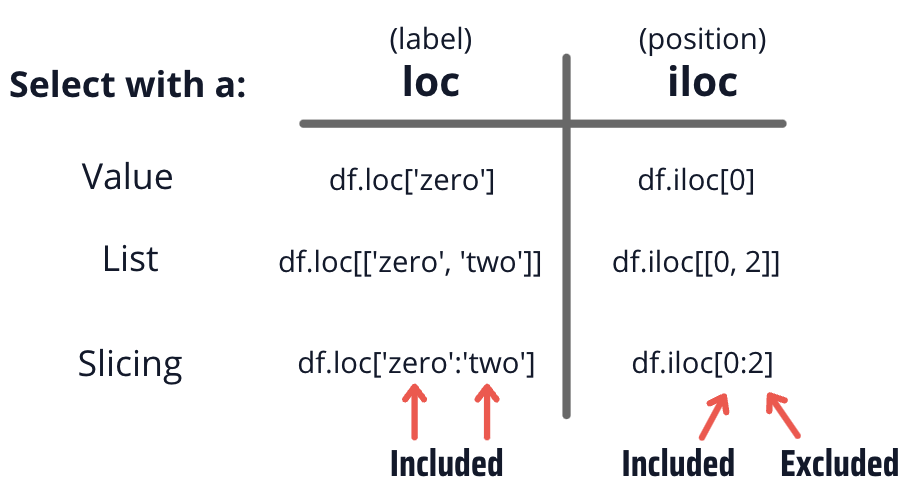

In [ ]:
# Filter rows where 'dataset' is either 'Cleveland' or 'Hungarian'
subset_isin = heart_data[heart_data["dataset"].isin(["Cleveland", "Hungary"])]
print(subset_isin)

# Filter rows where 'id' is in the list [1, 3, 5]
subset_ids_isin = heart_data[heart_data["AGE"].isin([50, 55, 60])]
print(subset_ids_isin)

    AGE     sex    dataset               cp  trestbps    fbs         restecg  \
id                                                                             
1    63    Male  Cleveland   typical angina     145.0   True  lv hypertrophy   
2    67    Male  Cleveland     asymptomatic     160.0  False  lv hypertrophy   
3    67    Male  Cleveland     asymptomatic     120.0  False  lv hypertrophy   
4    37    Male  Cleveland      non-anginal     130.0  False          normal   
5    41  Female  Cleveland  atypical angina     130.0  False  lv hypertrophy   
..   ..     ...        ...              ...       ...    ...             ...   
299  45    Male  Cleveland   typical angina     110.0  False          normal   
300  68    Male  Cleveland     asymptomatic     144.0   True          normal   
301  57    Male  Cleveland     asymptomatic     130.0  False          normal   
302  57  Female  Cleveland  atypical angina     130.0  False  lv hypertrophy   
509  47    Male    Hungary     asymptoma

In [ ]:
# Create a new DataFrame with only 'id', 'age', and 'sex' columns
heart_data_subset = heart_data[["num", "fbs", "sex"]]
heart_data_subset.head()

num    fbs     sex
id                    
1     0   True    Male
2     2  False    Male
3     1  False    Male
4     0  False    Male
5     0  False  Female

In [ ]:
# Get the first 5 rows and first 3 columns
subset_rows_cols = heart_data.iloc[:5, :3]
print(subset_rows_cols)

# Get specific rows and columns
specific_subset = heart_data.iloc[1:4, 2:5]
print(specific_subset)

   AGE     sex    dataset
id                       
1   63    Male  Cleveland
2   67    Male  Cleveland
3   67    Male  Cleveland
4   37    Male  Cleveland
5   41  Female  Cleveland
      dataset            cp  trestbps
id                                   
2   Cleveland  asymptomatic     160.0
3   Cleveland  asymptomatic     120.0
4   Cleveland   non-anginal     130.0


In [ ]:
# Add a 'date' column
import pandas as pd
heart_data["date"] = pd.date_range(start="2023-01-01", periods=len(heart_data), freq="D")

# Set 'date' as index and sort
heart_data_time = heart_data.set_index("date").sort_index()

heart_data_time.head(10)

AGE     sex    dataset               cp  trestbps    fbs  \
date                                                                  
2023-01-01  63    Male  Cleveland   typical angina     145.0   True   
2023-01-02  67    Male  Cleveland     asymptomatic     160.0  False   
2023-01-03  67    Male  Cleveland     asymptomatic     120.0  False   
2023-01-04  37    Male  Cleveland      non-anginal     130.0  False   
2023-01-05  41  Female  Cleveland  atypical angina     130.0  False   
2023-01-06  56    Male  Cleveland  atypical angina     120.0  False   
2023-01-07  62  Female  Cleveland     asymptomatic     140.0  False   
2023-01-08  57  Female  Cleveland     asymptomatic     120.0  False   
2023-01-09  63    Male  Cleveland     asymptomatic     130.0  False   
2023-01-10  53    Male  Cleveland     asymptomatic     140.0   True   

                   restecg  thalch  exang  oldpeak        slope   ca  \
date                                                                   
2023-01-01  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
2023-01-02  lv hypertrophy   108.0   True      1.5         flat  3.0   
2023-01-03  lv hypertrophy   129.0   True      2.6         flat  2.0   
2023-01-04          normal   187.0  False      3.5  downsloping  0.0   
2023-01-05  lv hypertrophy   172.0  False      1.4    upsloping  0.0   
2023-01-06          normal   178.0  False      0.8    upsloping  0.0   
2023-01-07  lv hypertrophy   160.0  False      3.6  downsloping  2.0   
2023-01-08          normal   163.0   True      0.6    upsloping  0.0   
2023-01-09  lv hypertrophy   147.0  False      1.4         flat  1.0   
2023-01-10  lv hypertrophy   155.0   True      3.1  downsloping  0.0   

                         thal  num  new_column  height  weight        bmi  
date                                                                       
2023-01-01       fixed defect    0           0     173      98  32.744161  
2023-01-02             normal    2           0     186      61  17.632096  
2023-01-03  reversable defect    1           0     188      92  26.029878  
2023-01-04             normal    0           0     173     106  35.417154  
2023-01-05             normal    0           0     152     120  51.939058  
2023-01-06             normal    0           0     151     114  49.997807  
2023-01-07             normal    3           0     171      81  27.700831  
2023-01-08             normal    0           0     157     111  45.032253  
2023-01-09  reversable defect    2           0     176      91  29.377583  
2023-01-10  reversable defect    1           0     156     126  51.775148

In [ ]:
# Subset data from January 1 to January 5
subset_time = heart_data_time.loc["2023-01-01":"2023-01-05"]
subset_time.head()

AGE     sex    dataset               cp  trestbps    fbs  \
date                                                                  
2023-01-01  63    Male  Cleveland   typical angina     145.0   True   
2023-01-02  67    Male  Cleveland     asymptomatic     160.0  False   
2023-01-03  67    Male  Cleveland     asymptomatic     120.0  False   
2023-01-04  37    Male  Cleveland      non-anginal     130.0  False   
2023-01-05  41  Female  Cleveland  atypical angina     130.0  False   

                   restecg  thalch  exang  oldpeak        slope   ca  \
date                                                                   
2023-01-01  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
2023-01-02  lv hypertrophy   108.0   True      1.5         flat  3.0   
2023-01-03  lv hypertrophy   129.0   True      2.6         flat  2.0   
2023-01-04          normal   187.0  False      3.5  downsloping  0.0   
2023-01-05  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                         thal  num  new_column  height  weight        bmi  
date                                                                       
2023-01-01       fixed defect    0           0     173      98  32.744161  
2023-01-02             normal    2           0     186      61  17.632096  
2023-01-03  reversable defect    1           0     188      92  26.029878  
2023-01-04             normal    0           0     173     106  35.417154  
2023-01-05             normal    0           0     152     120  51.939058

#### Practice Tasks: Sorting, Filtering, Slicing and Indexing

Time to practice data manipulation and selection techniques! Complete the following 3 tasks to master pandas data operations.

**Dataset Information:**
- Continue working with the heart disease dataset loaded as `heart_data`
- We'll practice sorting, filtering, grouping, and selecting data efficiently

##### Task 1: Sorting and Value Analysis
Practice sorting data and analyzing value distributions:

**a)** Sort the dataset by 'age' (ascending) and display the first 5 rows showing columns ['age', 'sex', 'chol', 'num']

**b)** Sort the dataset by 'thalch' (max heart rate, descending) and display the last 3 rows with columns ['age', 'thalch', 'num']

**c)** Get value counts for 'cp' (chest pain type) in descending order

**d)** Get value counts for 'sex' as proportions, sorted by values (ascending)

**e)** Sort the dataset by multiple columns: 'age' (ascending), then 'trestbps' (descending), and show the first 5 rows

In [ ]:
# Task 1: Write your code here

# a) Sort by age (ascending) and show first 5 rows with specific columns
# Your code here

# b) Sort by thalch (descending) and show last 3 rows with specific columns
# Your code here

# c) Value counts for cp (chest pain type) in descending order
# Your code here

# d) Value counts for sex as proportions, sorted by values (ascending)
# Your code here

# e) Sort by multiple columns: age (asc), then trestbps (desc), show first 5 rows
# Your code here

##### Task 2: Filtering and Grouping Operations
Practice filtering data and performing group analyses:

**a)** Filter the dataset to show only patients who are:
   - Older than 60 years AND
   - Have high cholesterol (chol > 250)

**b)** Filter the dataset to show patients who have:
   - Either 'Male' OR 'Female' sex AND chest pain type (cp) of 2 or 3
   - Display only 'age', 'sex', 'cp', and 'num' columns

**c)** Group the data by 'sex' and calculate the mean values for 'age', 'trestbps', and 'chol'

**d)** Group the data by 'cp' (chest pain type) and 'sex', then calculate the count of patients in each group

**e)** Find the average 'thalch' (max heart rate) for each value of 'num' (heart disease status)

In [ ]:
# Task 2: Write your code here

# a) Filter: age > 60 AND chol > 250
# Your code here

# b) Filter: (Male OR Female) AND cp in [2, 3], specific columns only
# Your code here

# c) Group by sex, mean of age, trestbps, chol
# Your code here

# d) Group by cp and sex, count patients
# Your code here

# e) Average thalch by num (heart disease status)
# Your code here

##### Task 3: Indexing and Data Selection
Practice data selection techniques using loc, iloc, and indexing:

**a)** Use `loc[]` to select patients with specific IDs: [10, 15, 20, 25]
   - Display only 'age', 'sex', 'cp', and 'num' columns

**b)** Use `iloc[]` to select:
   - Rows 5 to 15 (inclusive)
   - Columns 2 to 6 (inclusive)

**c)** Use `iloc[]` to select every 20th row from the dataset and display columns ['age', 'chol', 'num']

**d)** Use boolean indexing to select all patients with heart disease (num > 0) and display the first 10 rows

**e)** Create a random sample of 15 patients and calculate their average age and cholesterol levels

In [ ]:
# Task 3: Write your code here

# a) Use loc[] for specific IDs and columns
# Your code here

# b) Use iloc[] for rows 5-15 and columns 2-6
# Your code here

# c) Use iloc[] for every 20th row with specific columns
# Your code here

# d) Boolean indexing for patients with heart disease (num > 0), first 10 rows
# Your code here

# e) Random sample of 15 patients, calculate average age and cholesterol
# Your code here

---

#### 💡 Solutions: Sorting, Filtering, Slicing and Indexing

Below are the solutions to the data manipulation tasks. Try to solve them yourself first!

##### Solution 1: Sorting and Value Analysis

In [18]:
# Solution 1: Sorting and Value Analysis

# a) Sort by age (ascending) and show first 5 rows with specific columns
print("a) First 5 patients sorted by age (ascending):")
age_sorted = heart_data.sort_values('age')
print(age_sorted[['age', 'sex', 'chol', 'num']].head())

# b) Sort by thalch (descending) and show last 3 rows with specific columns
print("\nb) Last 3 patients sorted by thalch (max heart rate, descending):")
thalch_sorted = heart_data.sort_values('thalch', ascending=False)
print(thalch_sorted[['age', 'thalch', 'num']].tail(3))

# c) Value counts for cp (chest pain type) in descending order
print("\nc) Value counts for cp (chest pain type) in descending order:")
cp_counts = heart_data['cp'].value_counts()
print(cp_counts)

# d) Value counts for sex as proportions, sorted by values (ascending)
print("\nd) Value counts for sex as proportions, sorted by values (ascending):")
sex_proportions = heart_data['sex'].value_counts(normalize=True).sort_values()
print(sex_proportions)

# e) Sort by multiple columns: age (asc), then trestbps (desc), show first 5 rows
print("\ne) First 5 patients sorted by age (asc), then trestbps (desc):")
multi_sorted = heart_data.sort_values(['age', 'trestbps'], ascending=[True, False])
print(multi_sorted[['age', 'trestbps', 'sex', 'num']].head())

a) First 5 patients sorted by age (ascending):
     age     sex   chol  num
id                          
304   28    Male  132.0    0
306   29    Male    NaN    0
133   29    Male  204.0    0
305   29    Male  243.0    0
307   30  Female  237.0    0

b) Last 3 patients sorted by thalch (max heart rate, descending):
     age  thalch  num
id                   
906   61     NaN    1
917   62     NaN    0
919   58     NaN    0

c) Value counts for cp (chest pain type) in descending order:
cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

d) Value counts for sex as proportions, sorted by values (ascending):
sex
Female    0.21087
Male      0.78913
Name: proportion, dtype: float64

e) First 5 patients sorted by age (asc), then trestbps (desc):
     age  trestbps     sex  num
id                             
304   28     130.0    Male    0
306   29     140.0    Male    0
133   29     130.0    Male    0
305   29     120.0   

##### Solution 2: Filtering and Grouping Operations

In [19]:
# Solution 2: Filtering and Grouping Operations

# a) Filter: age > 60 AND chol > 250
print("a) Patients older than 60 with high cholesterol (>250):")
filtered_a = heart_data[(heart_data['age'] > 60) & (heart_data['chol'] > 250)]
print(f"Number of patients: {len(filtered_a)}")
print(filtered_a[['age', 'sex', 'chol', 'num']].head())

# b) Filter: (Male OR Female) AND cp in [2, 3], specific columns only
print("\nb) Patients with chest pain type 2 or 3:")
filtered_b = heart_data[heart_data['cp'].isin([2, 3])]
print(f"Number of patients: {len(filtered_b)}")
print(filtered_b[['age', 'sex', 'cp', 'num']].head())

# c) Group by sex, mean of age, trestbps, chol
print("\nc) Mean values by sex:")
grouped_c = heart_data.groupby('sex')[['age', 'trestbps', 'chol']].mean()
print(grouped_c)

# d) Group by cp and sex, count patients
print("\nd) Patient count by chest pain type and sex:")
grouped_d = heart_data.groupby(['cp', 'sex']).size().unstack(fill_value=0)
print(grouped_d)

# e) Average thalch by num (heart disease status)
print("\ne) Average max heart rate by heart disease status:")
grouped_e = heart_data.groupby('num')['thalch'].mean()
print(grouped_e)

a) Patients older than 60 with high cholesterol (>250):
Number of patients: 79
    age     sex   chol  num
id                         
2    67    Male  286.0    2
7    62  Female  268.0    3
9    63    Male  254.0    2
33   64    Male  335.0    1
43   71  Female  302.0    0

b) Patients with chest pain type 2 or 3:
Number of patients: 0
Empty DataFrame
Columns: [age, sex, cp, num]
Index: []

c) Mean values by sex:
              age    trestbps        chol
sex                                      
Female  52.474227  132.093750  241.481283
Male    53.787879  132.143498  187.864865

d) Patient count by chest pain type and sex:
sex              Female  Male
cp                           
asymptomatic         70   426
atypical angina      61   113
non-anginal          53   151
typical angina       10    36

e) Average max heart rate by heart disease status:
num
0    148.800512
1    131.035714
2    128.666667
3    120.500000
4    127.846154
Name: thalch, dtype: float64


##### Solution 3: Indexing and Data Selection

In [17]:
# Solution 3: Indexing and Data Selection

# a) Use loc[] for specific IDs and columns
print("a) Patients with specific IDs [10, 15, 20, 25]:")
try:
    selected_a = heart_data.loc[[10, 15, 20, 25], ['age', 'sex', 'cp', 'num']]
    print(selected_a)
except KeyError as e:
    print(f"Note: Some IDs might not exist in the dataset. Available IDs range from {heart_data.index.min()} to {heart_data.index.max()}")
    available_ids = [id for id in [10, 15, 20, 25] if id in heart_data.index]
    if available_ids:
        selected_a = heart_data.loc[available_ids, ['age', 'sex', 'cp', 'num']]
        print(f"Showing available IDs {available_ids}:")
        print(selected_a)

# b) Use iloc[] for rows 5-15 and columns 2-6
print("\nb) Rows 5-15, columns 2-6 using iloc:")
selected_b = heart_data.iloc[5:16, 2:7]  # iloc is exclusive of end
print(selected_b)

# c) Use iloc[] for every 20th row with specific columns
print("\nc) Every 20th row with age, chol, num columns:")
every_20th = heart_data.iloc[::20]
selected_c = every_20th[['age', 'chol', 'num']]
print(selected_c)

# d) Boolean indexing for patients with heart disease (num > 0), first 10 rows
print("\nd) First 10 patients with heart disease (num > 0):")
heart_disease_patients = heart_data[heart_data['num'] > 0]
selected_d = heart_disease_patients.head(10)
print(selected_d[['age', 'sex', 'cp', 'num']])

# e) Random sample of 15 patients, calculate average age and cholesterol
print("\ne) Random sample of 15 patients:")
import numpy as np
np.random.seed(42)  # For reproducible results
random_sample = heart_data.sample(n=15, random_state=42)
avg_age = random_sample['age'].mean()
avg_chol = random_sample['chol'].mean()
print(f"Average age: {avg_age:.1f} years")
print(f"Average cholesterol: {avg_chol:.1f} mg/dl")
print("\nSample patients:")
print(random_sample[['age', 'sex', 'chol', 'num']].head())

First 10 patients using iloc:
    age     sex               cp  num
id                                   
1    63    Male   typical angina    0
2    67    Male     asymptomatic    2
3    67    Male     asymptomatic    1
4    37    Male      non-anginal    0
5    41  Female  atypical angina    0
6    56    Male  atypical angina    0
7    62  Female     asymptomatic    3
8    57  Female     asymptomatic    0
9    63    Male     asymptomatic    2
10   53    Male     asymptomatic    1

Every 50th patient using iloc:
     age   chol  num
id                  
1     63  233.0    0
51    41  198.0    0
101   45  260.0    0
151   52  298.0    0
201   50  254.0    0
251   57  201.0    0
301   57  131.0    3
351   41  245.0    0
401   48    NaN    0
451   54  171.0    0
501   40  466.0    1
551   56  213.0    1
601   36    0.0    1
651   55    0.0    4
701   63    0.0    1
751   54    0.0    3
801   58  458.0    0
851   48  220.0    1
901   57  264.0    1

Last 5 patients using iloc:
     age    

### 4. Merging and joining

First, let's create a few datasets to demonstrate different merge methods:

In [ ]:
# Create a new DataFrame
scores_data = {
    "id": [1, 2, 3],
    "risk_score": [3.5, 7.2, 6.1]
}
df_scores = pd.DataFrame(scores_data).set_index("id")
print(df_scores)

    risk_score
id            
1          3.5
2          7.2
3          6.1


In [ ]:
# Create another one
hospital_data = {
    "id": [2, 3, 4],
    "hospital": ["General", "City Clinic", "Metro Health"]
}
df_hospital = pd.DataFrame(hospital_data).set_index("id")
print(df_hospital)

        hospital
id              
2        General
3    City Clinic
4   Metro Health


* Inner join
  
Saves only those rows where the patient ID is in both data sets:

In [ ]:
# Merge df and df_scores on the index. An inner join combines rows that have matching indices in both DataFrames.
heart_inner = pd.merge(heart_data, df_scores, left_index=True, right_index=True, how="inner")
print(heart_inner)

   AGE   sex    dataset              cp  trestbps    fbs         restecg  \
id                                                                         
1   63  Male  Cleveland  typical angina     145.0   True  lv hypertrophy   
2   67  Male  Cleveland    asymptomatic     160.0  False  lv hypertrophy   
3   67  Male  Cleveland    asymptomatic     120.0  False  lv hypertrophy   

    thalch  exang  oldpeak        slope   ca               thal  num  \
id                                                                     
1    150.0  False      2.3  downsloping  0.0       fixed defect    0   
2    108.0   True      1.5         flat  3.0             normal    2   
3    129.0   True      2.6         flat  2.0  reversable defect    1   

    new_column  height  weight        bmi       date  risk_score  
id                                                                
1            0     173      98  32.744161 2023-01-01         3.5  
2            0     186      61  17.632096 2023-01-02     

In [ ]:
heart_inner

AGE   sex    dataset              cp  trestbps    fbs         restecg  \
id                                                                         
1   63  Male  Cleveland  typical angina     145.0   True  lv hypertrophy   
2   67  Male  Cleveland    asymptomatic     160.0  False  lv hypertrophy   
3   67  Male  Cleveland    asymptomatic     120.0  False  lv hypertrophy   

    thalch  exang  oldpeak        slope   ca               thal  num  \
id                                                                     
1    150.0  False      2.3  downsloping  0.0       fixed defect    0   
2    108.0   True      1.5         flat  3.0             normal    2   
3    129.0   True      2.6         flat  2.0  reversable defect    1   

    new_column  height  weight        bmi       date  risk_score  
id                                                                
1            0     173      98  32.744161 2023-01-01         3.5  
2            0     186      61  17.632096 2023-01-02         7.2  
3            0     188      92  26.029878 2023-01-03         6.1

* Left join

Saves all rows from heart_data and adds risk scores where they exist NaNs will appear where there are no corresponding risk scores

In [ ]:
# A left join keeps all rows from the left DataFrame and adds matching rows from the right DataFrame.
heart_left = pd.merge(heart_data, df_scores, left_index=True, right_index=True, how="left")
print(heart_left)

    AGE     sex        dataset               cp  trestbps    fbs  \
id                                                                 
1    63    Male      Cleveland   typical angina     145.0   True   
2    67    Male      Cleveland     asymptomatic     160.0  False   
3    67    Male      Cleveland     asymptomatic     120.0  False   
4    37    Male      Cleveland      non-anginal     130.0  False   
5    41  Female      Cleveland  atypical angina     130.0  False   
..   ..     ...            ...              ...       ...    ...   
300  68    Male      Cleveland     asymptomatic     144.0   True   
301  57    Male      Cleveland     asymptomatic     130.0  False   
302  57  Female      Cleveland  atypical angina     130.0  False   
509  47    Male        Hungary     asymptomatic     150.0  False   
749  56    Male  VA Long Beach     asymptomatic     120.0  False   

            restecg  thalch  exang  oldpeak        slope   ca  \
id                                                

Sometimes we just need to add new data to an existing set:

In [ ]:
### Concatenation
# Concatenation stacks DataFrames vertically or horizontally.
new_patients = {
    "id": [4],
    "age": [55],
    "sex": ["Female"],
    "dataset": ["Cleveland"],
    "cp": ["non-anginal pain"],
    "trestbps": [140.0],
    "chol": [250.0],
    "fbs": [False],
    "restecg": ["normal"],
    "thalch": [140.0],
    "exang": [False],
    "oldpeak": [1.4],
    "slope": ["flat"],
    "ca": [0.0],
    "thal": ["normal"],
    "num": [0]
}
df_new = pd.DataFrame(new_patients).set_index("id")


Vertical concatenation (adding new rows)

In [ ]:
# Concatenate vertically
heart_concat = pd.concat([heart_data, df_new])
print(heart_concat)

     AGE     sex        dataset                cp  trestbps    fbs  \
id                                                                   
1     63    Male      Cleveland    typical angina     145.0   True   
2     67    Male      Cleveland      asymptomatic     160.0  False   
3     67    Male      Cleveland      asymptomatic     120.0  False   
4     37    Male      Cleveland       non-anginal     130.0  False   
5     41  Female      Cleveland   atypical angina     130.0  False   
..   ...     ...            ...               ...       ...    ...   
301   57    Male      Cleveland      asymptomatic     130.0  False   
302   57  Female      Cleveland   atypical angina     130.0  False   
509   47    Male        Hungary      asymptomatic     150.0  False   
749   56    Male  VA Long Beach      asymptomatic     120.0  False   
4    NaN  Female      Cleveland  non-anginal pain     140.0  False   

            restecg  thalch  exang  oldpeak  ...   ca               thal num  \
id       

Horizontal concatenation (adding new columns) axis=1 indicates horizontal concatenation

In [ ]:
# Concatenate heart_data and df_scores horizontally
df_horizontal = pd.concat([heart_data, df_scores], axis=1) # axis=1 for horizontal concatenation
print(df_horizontal)

    AGE     sex        dataset               cp  trestbps    fbs  \
id                                                                 
1    63    Male      Cleveland   typical angina     145.0   True   
2    67    Male      Cleveland     asymptomatic     160.0  False   
3    67    Male      Cleveland     asymptomatic     120.0  False   
4    37    Male      Cleveland      non-anginal     130.0  False   
5    41  Female      Cleveland  atypical angina     130.0  False   
..   ..     ...            ...              ...       ...    ...   
300  68    Male      Cleveland     asymptomatic     144.0   True   
301  57    Male      Cleveland     asymptomatic     130.0  False   
302  57  Female      Cleveland  atypical angina     130.0  False   
509  47    Male        Hungary     asymptomatic     150.0  False   
749  56    Male  VA Long Beach     asymptomatic     120.0  False   

            restecg  thalch  exang  oldpeak        slope   ca  \
id                                                

Merge by a specific column

In [ ]:
# if merge on the column
heart_merged = pd.merge(heart_data, df_scores, on="id", how="inner")

In [ ]:
heart_merged

AGE   sex    dataset              cp  trestbps    fbs         restecg  \
id                                                                         
1   63  Male  Cleveland  typical angina     145.0   True  lv hypertrophy   
2   67  Male  Cleveland    asymptomatic     160.0  False  lv hypertrophy   
3   67  Male  Cleveland    asymptomatic     120.0  False  lv hypertrophy   

    thalch  exang  oldpeak        slope   ca               thal  num  \
id                                                                     
1    150.0  False      2.3  downsloping  0.0       fixed defect    0   
2    108.0   True      1.5         flat  3.0             normal    2   
3    129.0   True      2.6         flat  2.0  reversable defect    1   

    new_column  height  weight        bmi       date  risk_score  
id                                                                
1            0     173      98  32.744161 2023-01-01         3.5  
2            0     186      61  17.632096 2023-01-02         7.2  
3            0     188      92  26.029878 2023-01-03         6.1

---

#### Practice Tasks - Merging & Joining

---

In [ ]:
# Task 1: Basic DataFrame Merging
# Practice different types of joins and understanding pandas merge operations:

# a) Create a DataFrame called 'patient_demographics' with the following data:
#    - patient_id: [1, 2, 3, 4, 5]
#    - height_cm: [170, 165, 180, 175, 160]
#    - weight_kg: [70, 85, 90, 75, 60]
#    Set patient_id as the index

# b) Create another DataFrame called 'patient_lifestyle' with:
#    - patient_id: [2, 3, 4, 5, 6] 
#    - smoking: ['No', 'Yes', 'No', 'Yes', 'No']
#    - exercise_freq: ['Daily', 'Never', 'Weekly', 'Monthly', 'Daily']
#    Set patient_id as the index

# c) Perform an inner join between the two DataFrames using pandas merge

# d) Perform a left join to keep all patients from patient_demographics

# e) Calculate BMI (weight_kg / (height_cm/100)²) for patients with complete data

In [ ]:
# Task 2: DataFrame Concatenation and Data Combination
# Practice combining DataFrames using pandas concat:

# a) Create two DataFrames representing different hospital records:
#    hospital_a: patients with IDs [10, 11, 12] and ages [45, 50, 35]
#    hospital_b: patients with IDs [13, 14, 15] and ages [60, 55, 40]
#    Both should have columns: patient_id (as index), age, hospital_name

# b) Concatenate these DataFrames vertically to create a combined patient database

# c) Create a new DataFrame with additional information for some patients:
#    - patient_id: [10, 11, 13, 14]
#    - emergency_contact: ['John Doe', 'Jane Smith', 'Bob Johnson', 'Alice Brown']

# d) Concatenate this horizontally with the combined hospital data

# e) Identify which patients have missing emergency contact information

In [ ]:
# Task 3: Advanced Merging with Heart Disease Data
# Practice merging with the actual heart_data using different strategies:

# a) Create a risk assessment DataFrame with patient IDs from heart_data (first 10 patients):
#    - Use reset_index() to get patient_id starting from 0
#    - Add columns: risk_category ['Low', 'Medium', 'High'] and follow_up_months [6, 12, 3]

# b) Merge this risk assessment with heart_data using an outer join on patient ID

# c) Create a medication DataFrame for patients with heart disease (num > 0):
#    - Extract patient IDs where num > 0
#    - Add columns: medication ['Aspirin', 'Beta-blocker', 'ACE-inhibitor'] and dosage

# d) Merge heart_data with both risk assessment and medication data

# e) Analyze how many patients have complete records vs missing data in each category

---

####  Solutions - Introduction to pandas (Merging & Joining)

---

In [ ]:
# Solution 1: Basic DataFrame Merging

# a) Create patient_demographics DataFrame
patient_demographics = pd.DataFrame({
    'patient_id': [1, 2, 3, 4, 5],
    'height_cm': [170, 165, 180, 175, 160],
    'weight_kg': [70, 85, 90, 75, 60]
}).set_index('patient_id')

print("a) Patient Demographics:")
print(patient_demographics)

# b) Create patient_lifestyle DataFrame
patient_lifestyle = pd.DataFrame({
    'patient_id': [2, 3, 4, 5, 6],
    'smoking': ['No', 'Yes', 'No', 'Yes', 'No'],
    'exercise_freq': ['Daily', 'Never', 'Weekly', 'Monthly', 'Daily']
}).set_index('patient_id')

print("\nb) Patient Lifestyle:")
print(patient_lifestyle)

# c) Inner join between the two DataFrames
inner_merged = pd.merge(patient_demographics, patient_lifestyle, left_index=True, right_index=True, how='inner')

print("\nc) Inner Join Result:")
print(inner_merged)
print(f"Patients with complete data: {len(inner_merged)}")

# d) Left join to keep all patients from patient_demographics
left_merged = pd.merge(patient_demographics, patient_lifestyle, left_index=True, right_index=True, how='left')

print("\nd) Left Join Result:")
print(left_merged)
print(f"Total patients from demographics: {len(left_merged)}")
print(f"Patients missing lifestyle data: {left_merged['smoking'].isna().sum()}")

# e) Calculate BMI for patients with complete data
complete_data = inner_merged.copy()
complete_data['bmi'] = complete_data['weight_kg'] / (complete_data['height_cm'] / 100) ** 2

print("\ne) BMI Calculation for Complete Data:")
print(complete_data[['height_cm', 'weight_kg', 'bmi']])
print(f"Average BMI: {complete_data['bmi'].mean():.1f}")
print(f"BMI Range: {complete_data['bmi'].min():.1f} - {complete_data['bmi'].max():.1f}")

In [ ]:
# Solution 2: DataFrame Concatenation and Data Combination

# a) Create hospital DataFrames
hospital_a = pd.DataFrame({
    'patient_id': [10, 11, 12],
    'age': [45, 50, 35],
    'hospital_name': ['Hospital A', 'Hospital A', 'Hospital A']
}).set_index('patient_id')

hospital_b = pd.DataFrame({
    'patient_id': [13, 14, 15],
    'age': [60, 55, 40],
    'hospital_name': ['Hospital B', 'Hospital B', 'Hospital B']
}).set_index('patient_id')

print("a) Hospital A:")
print(hospital_a)
print("\nHospital B:")
print(hospital_b)

# b) Concatenate DataFrames vertically
combined_hospitals = pd.concat([hospital_a, hospital_b])

print("\nb) Combined Hospital Data:")
print(combined_hospitals)
print(f"Total patients: {len(combined_hospitals)}")

# c) Create emergency contact DataFrame
emergency_contacts = pd.DataFrame({
    'patient_id': [10, 11, 13, 14],
    'emergency_contact': ['John Doe', 'Jane Smith', 'Bob Johnson', 'Alice Brown']
}).set_index('patient_id')

print("\nc) Emergency Contacts:")
print(emergency_contacts)

# d) Concatenate horizontally with combined hospital data
final_data = pd.concat([combined_hospitals, emergency_contacts], axis=1)

print("\nd) Final Combined Data (Horizontal Concatenation):")
print(final_data)

# e) Identify patients with missing emergency contact information
missing_contacts = final_data['emergency_contact'].isna()

print("\ne) Missing Emergency Contact Analysis:")
print(f"Patients missing emergency contacts: {missing_contacts.sum()}")
print("Patient IDs with missing contacts:")
print(final_data[missing_contacts].index.tolist())

print("\nComplete summary:")
for patient_id in final_data.index:
    has_contact = 'Yes' if not pd.isna(final_data.loc[patient_id, 'emergency_contact']) else 'No'
    print(f"Patient {patient_id}: Age {final_data.loc[patient_id, 'age']}, Emergency Contact: {has_contact}")

In [ ]:
# Solution 3: Advanced Merging with Heart Disease Data

# a) Create risk assessment DataFrame for first 10 patients
heart_data_reset = heart_data.reset_index()
heart_data_reset['patient_id'] = heart_data_reset.index

risk_assessment = pd.DataFrame({
    'patient_id': list(range(10)),
    'risk_category': ['Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low', 'Medium', 'High', 'Low'],
    'follow_up_months': [6, 12, 3, 6, 12, 3, 6, 12, 3, 6]
})

print("a) Risk Assessment DataFrame:")
print(risk_assessment)

# b) Merge with heart_data using outer join
heart_with_risk = pd.merge(heart_data_reset, risk_assessment, on='patient_id', how='outer')

print("\nb) Heart Data with Risk Assessment (first 15 rows):")
print(heart_with_risk[['patient_id', 'age', 'sex', 'num', 'risk_category', 'follow_up_months']].head(15))
print(f"Total records after outer join: {len(heart_with_risk)}")

# c) Create medication DataFrame for patients with heart disease
heart_disease_patients = heart_data_reset[heart_data_reset['num'] > 0]
medication_data = pd.DataFrame({
    'patient_id': heart_disease_patients['patient_id'].head(10).tolist(),  # First 10 with disease
    'medication': ['Aspirin', 'Beta-blocker', 'ACE-inhibitor', 'Aspirin', 'Beta-blocker', 
                  'ACE-inhibitor', 'Aspirin', 'Beta-blocker', 'ACE-inhibitor', 'Aspirin'],
    'dosage': ['100mg', '25mg', '10mg', '100mg', '50mg', '5mg', '100mg', '25mg', '10mg', '100mg']
})

print("\nc) Medication DataFrame:")
print(medication_data)

# d) Merge heart_data with both risk assessment and medication data
# First merge with risk assessment
heart_complete = pd.merge(heart_data_reset, risk_assessment, on='patient_id', how='left')
# Then merge with medication data
heart_complete = pd.merge(heart_complete, medication_data, on='patient_id', how='left')

print("\nd) Complete Heart Data with Risk and Medication (first 15 rows):")
columns_to_show = ['patient_id', 'age', 'sex', 'num', 'risk_category', 'medication', 'dosage']
print(heart_complete[columns_to_show].head(15))

# e) Analyze complete vs missing data
print("\ne) Data Completeness Analysis:")
print(f"Total patients: {len(heart_complete)}")
print(f"Patients with risk assessment: {heart_complete['risk_category'].notna().sum()}")
print(f"Patients with medication data: {heart_complete['medication'].notna().sum()}")
print(f"Patients with complete data (all fields): {heart_complete[['risk_category', 'medication']].notna().all(axis=1).sum()}")

# Breakdown by heart disease status
has_disease = heart_complete['num'] > 0
print(f"\nPatients with heart disease (num > 0): {has_disease.sum()}")
print(f"Patients without heart disease (num = 0): {(~has_disease).sum()}")

print(f"\nOf patients WITH heart disease:")
print(f"- Have risk assessment: {heart_complete[has_disease]['risk_category'].notna().sum()}")
print(f"- Have medication data: {heart_complete[has_disease]['medication'].notna().sum()}")

print(f"\nOf patients WITHOUT heart disease:")
print(f"- Have risk assessment: {heart_complete[~has_disease]['risk_category'].notna().sum()}")
print(f"- Have medication data: {heart_complete[~has_disease]['medication'].notna().sum()}")

## Introduction to Seaborn and Matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("data/heart_disease_uci.csv")

In [ ]:
df

id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
0      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1      lv hypertrophy   108.0   True      1.5         flat  3.0   
2      lv hypertrophy   129.0   True      2.6         flat  2.0   
3              normal   187.0  False      3.5  downsloping  0.0   
4      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
915  st-t abnormality   154.0  False      0.0          NaN  NaN   
916  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
917  st-t abnormality   100.0  False      0.0          NaN  NaN   
918    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
919    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  num  
0         fixed defect    0  
1               normal    2  
2    reversable defect    1  
3               normal    0  
4               normal    0  
..                 ...  ...  
915                NaN    1  
916                NaN    0  
917       fixed defect    2  
918                NaN    0  
919                NaN    1  

[920 rows x 16 columns]

**Differences between Seaborn and Matplotlib**
- Matplotlib: Low-level, highly customizable.
- Seaborn: High-level, built on top of Matplotlib, easier for statistical plots.


In [ ]:
"""Need to remove NaN, before analysis"""

### Basics of Matplotlib

![Image Description](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)


![Image Description](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)

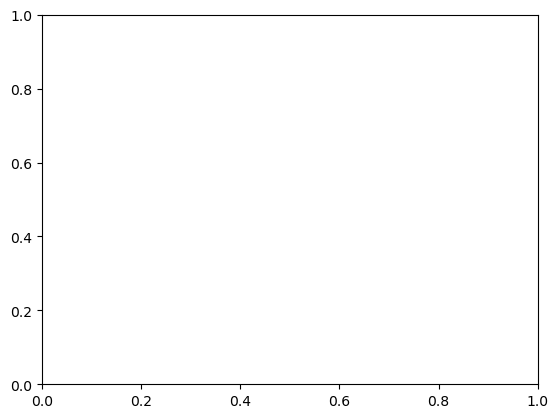

In [ ]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Call the show function to show the result
plt.show()

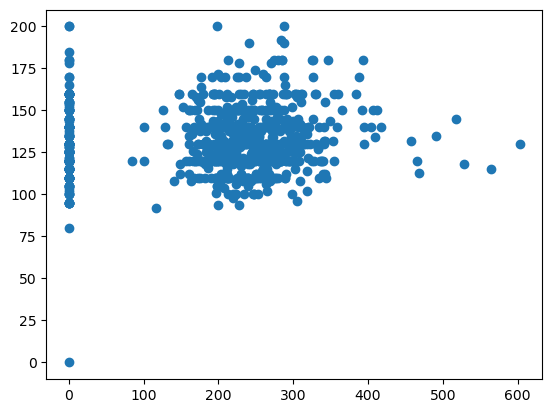

In [ ]:
# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot age against cholesterol
ax.scatter(df['chol'], df['trestbps'])

# Call the show function
plt.show()

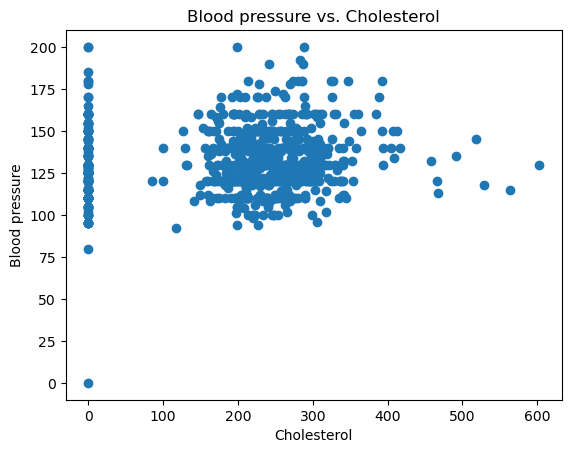

In [ ]:

# Create a Figure and an Axes with plt.subplots
fig, ax = plt.subplots()

# Plot age against cholesterol
ax.scatter(df['chol'], df['trestbps'])

# Customize the x-axis label
ax.set_ylabel("Blood pressure")

# Customize the y-axis label
ax.set_xlabel("Cholesterol")

# Add the title
ax.set_title("Blood pressure vs. Cholesterol")

# Display the figure
plt.show()

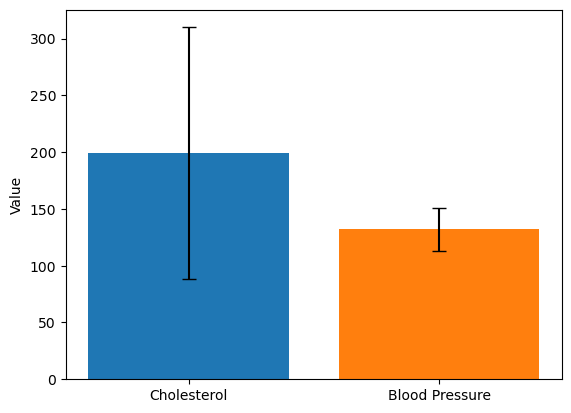

In [ ]:
# Create a bar chart with error bars
fig, ax = plt.subplots()

# Add a bar for the cholesterol mean/std
ax.bar("Cholesterol", df["chol"].mean(), yerr=df["chol"].std(), capsize=5)

# Add a bar for the blood pressure mean/std
ax.bar("Blood Pressure", df["trestbps"].mean(), yerr=df["trestbps"].std(), capsize=5)

ax.set_ylabel("Value")
plt.show()

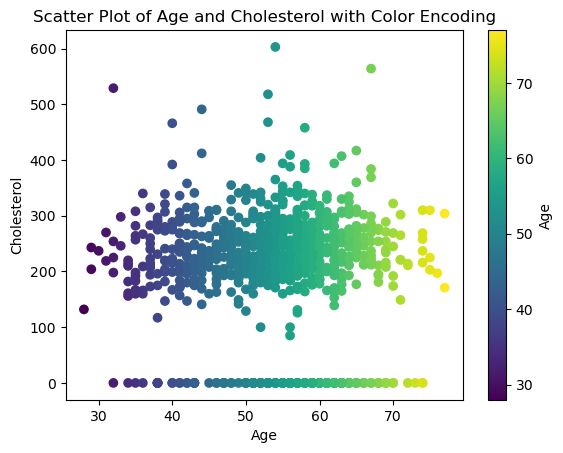

In [ ]:
fig, ax = plt.subplots()
scatter = ax.scatter(df["age"], df["chol"], c=df["age"], cmap='viridis')
ax.set_title("Scatter Plot of Age and Cholesterol with Color Encoding")
ax.set_xlabel("Age")
ax.set_ylabel("Cholesterol")
plt.colorbar(scatter, ax=ax, label='Age')
plt.show()

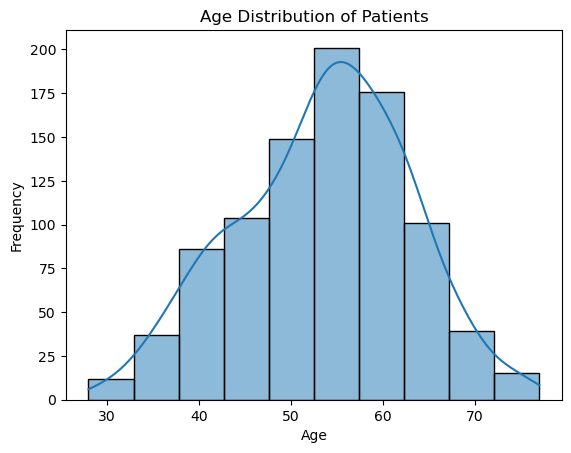

In [ ]:
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of ages in the dataset. The KDE line helps to understand the density of the age distribution.


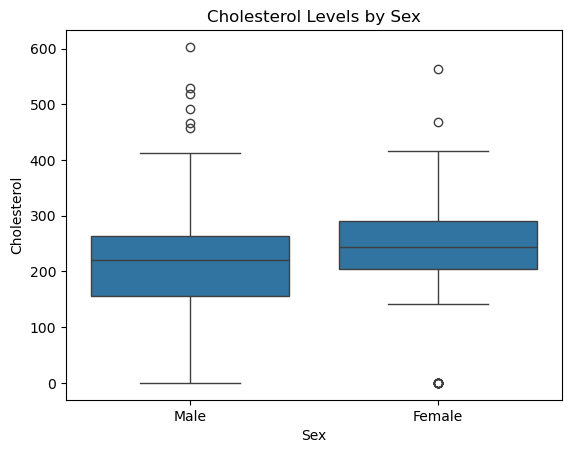

In [ ]:
sns.boxplot(x='sex', y='chol', data=df)
plt.title('Cholesterol Levels by Sex')
plt.xlabel('Sex')
plt.ylabel('Cholesterol')
plt.show()

This boxplot compares the cholesterol levels between male and female patients. It shows the median, quartiles, and potential outliers.


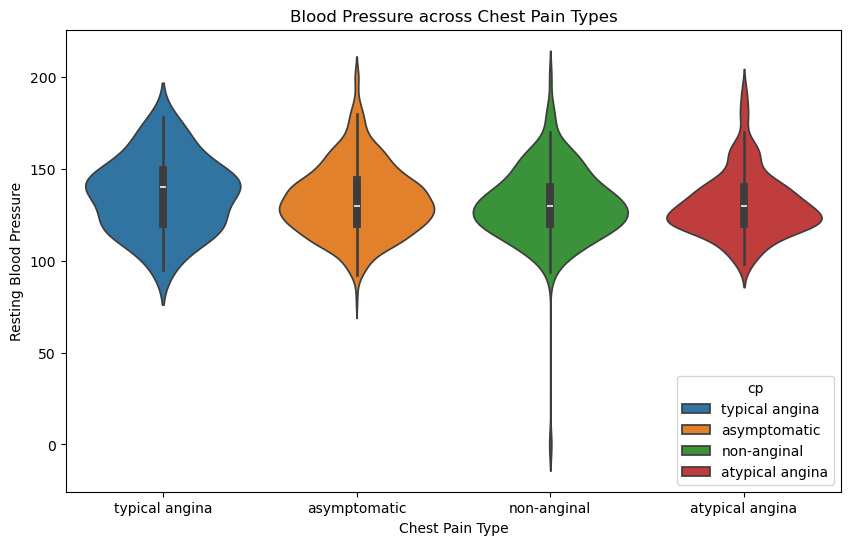

In [ ]:
# Create a violin plot for blood pressure across chest pain types
fig = plt.subplots(figsize=(10, 6))
sns.violinplot(x='cp', y='trestbps', data=df, hue="cp")
# remove x labels #plt.xticks([], [])
plt.title('Blood Pressure across Chest Pain Types')
plt.xlabel('Chest Pain Type')
plt.ylabel('Resting Blood Pressure')
plt.show()

This violin plot shows the distribution of resting blood pressure for different chest pain types. It combines aspects of boxplot and KDE.


### Categorical Data Visualization


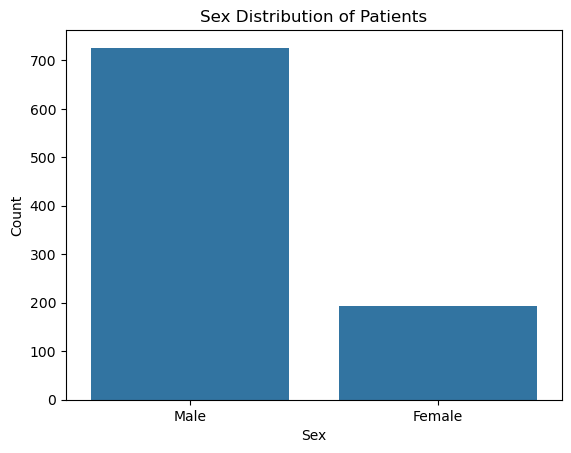

In [ ]:
# Create a count plot for sex distribution
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution of Patients')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

This count plot shows the number of male and female patients in the dataset.

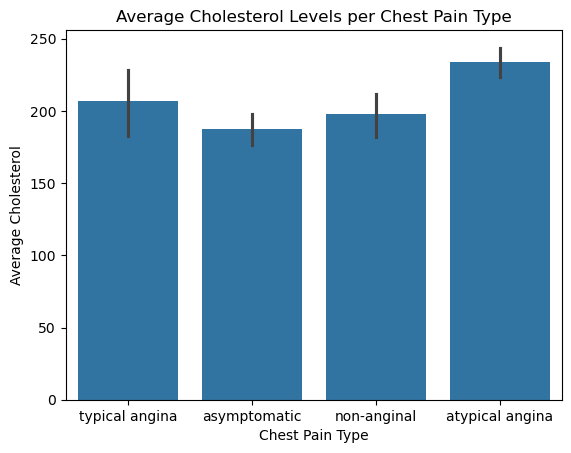

In [ ]:
# Create a bar plot for average cholesterol levels per chest pain type # change error, cap, color
sns.barplot(x='cp', y='chol', data=df, estimator=np.mean)
plt.title('Average Cholesterol Levels per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Average Cholesterol')
plt.show()

This bar plot shows the average cholesterol levels for each chest pain type.


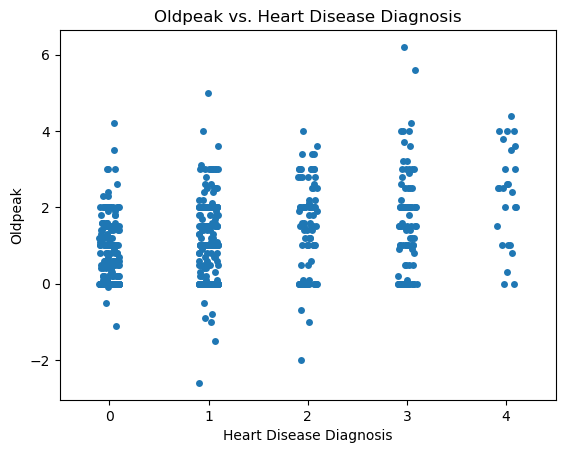

In [ ]:
# Create a strip plot for oldpeak vs. heart disease diagnosis
sns.stripplot(x='num', y='oldpeak', data=df)
plt.title('Oldpeak vs. Heart Disease Diagnosis')
plt.xlabel('Heart Disease Diagnosis')
plt.ylabel('Oldpeak')
plt.show()

These plots show the relationship between oldpeak and heart disease diagnosis. Swarm plots show individual data points, while strip plots show the distribution.


### Advanced Visualization Techniques

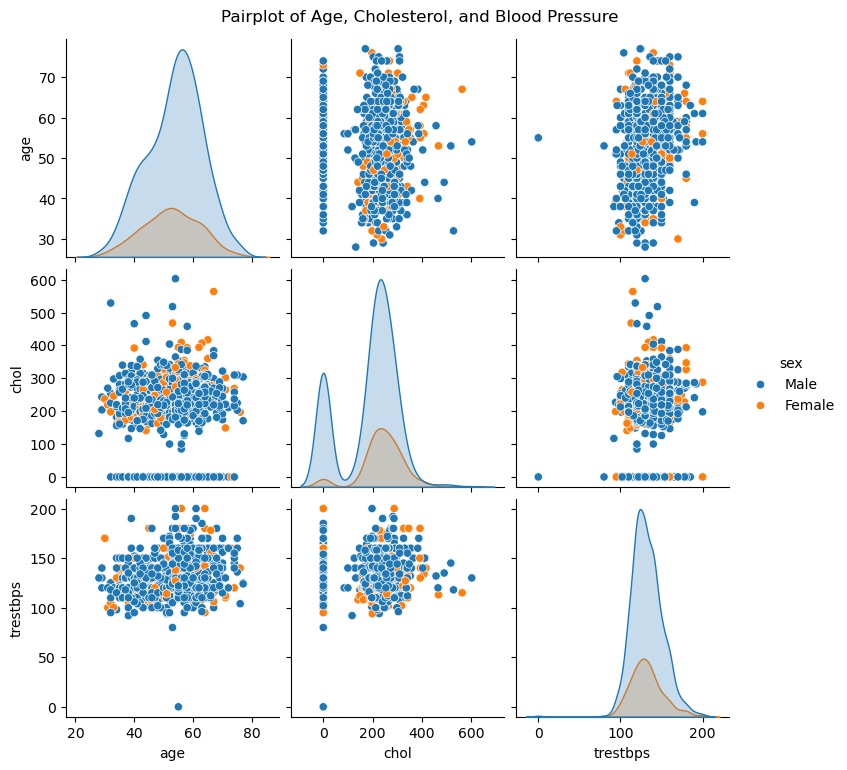

In [ ]:
# Create a pairplot for age, cholesterol, and blood pressure
sns.pairplot(df, vars=['age', 'chol', 'trestbps'], hue='sex')
plt.suptitle('Pairplot of Age, Cholesterol, and Blood Pressure', y=1.02)
plt.show()

This pairplot shows the relationships between age, cholesterol, and blood pressure, with different colors for male and female patients.


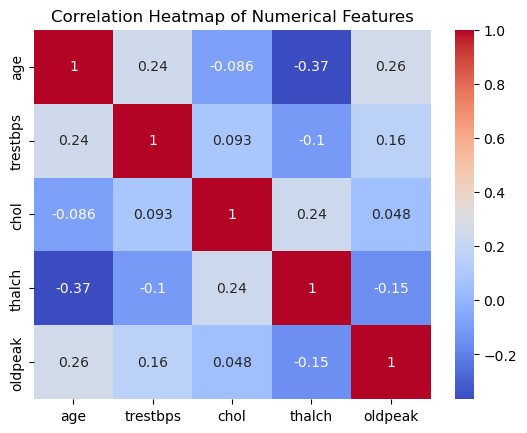

In [ ]:
corr = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

This heatmap shows the correlation between numerical features in the dataset. High correlation values indicate strong relationships.


### Customizing Plots


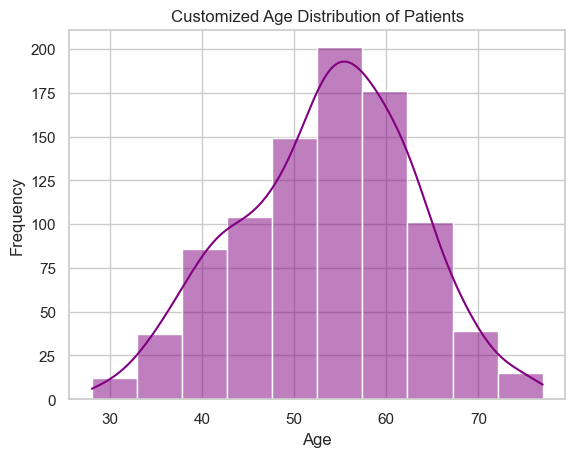

In [ ]:
# Customize plot with colors, labels, and styles
sns.set(style='whitegrid')
sns.histplot(df['age'], bins=10, kde=True, color='purple')
plt.title('Customized Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

This customized plot uses a different color and style for better visualization.


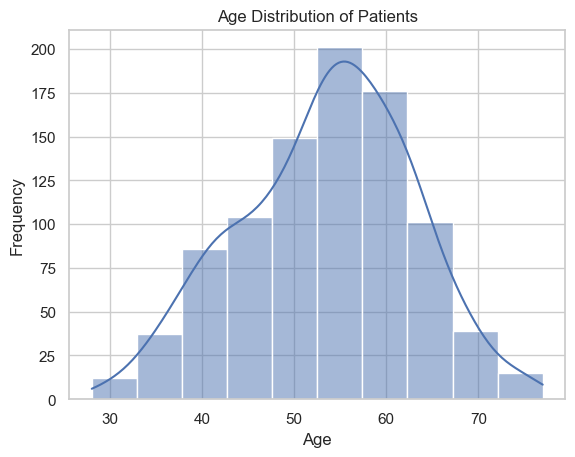

In [ ]:
# Save the plot as a PNG file
sns.histplot(df['age'], bins=10, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('age_distribution.png')
plt.show()

This code saves the age distribution plot as a PNG file for use in reports and publications.


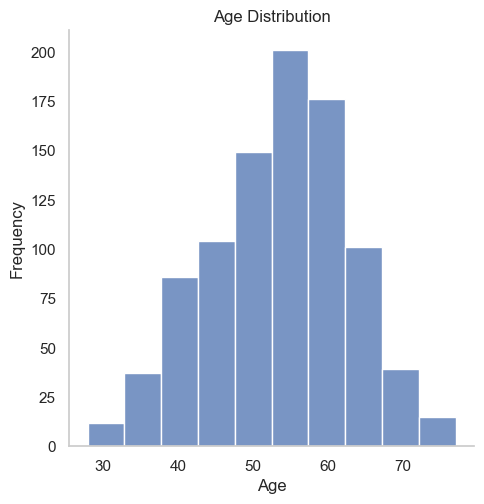

In [ ]:
# Plot a histogram using displot
sns.displot(df['age'], bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

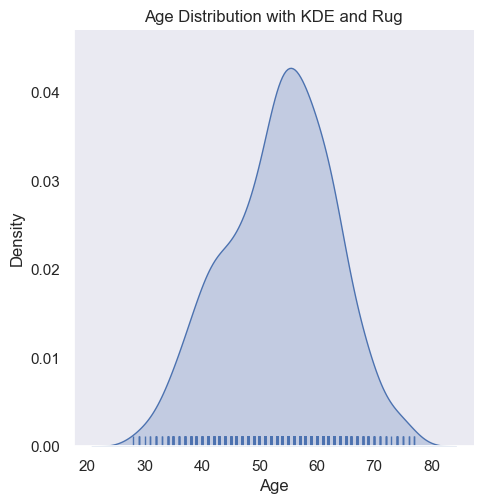

In [ ]:
# Create a displot of the age with KDE and rug
sns.displot(df['age'], kind='kde', rug=True, fill=True)
plt.title('Age Distribution with KDE and Rug')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(False)
plt.show()

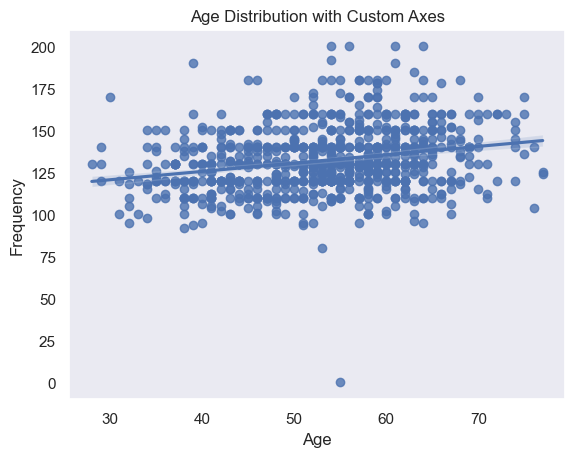

In [ ]:
# Create a regression plot of cholesterol vs. age
fig, ax = plt.subplots()
sns.regplot(x="age", y="trestbps", data=df)
plt.grid(False)
ax.set(xlabel="Age", ylabel="Frequency", title="Age Distribution with Custom Axes")
plt.show()


#plt.title('Resting blood pressure vs. Age')
#plt.xlabel('Age')
#plt.ylabel('Resting blood pressure')

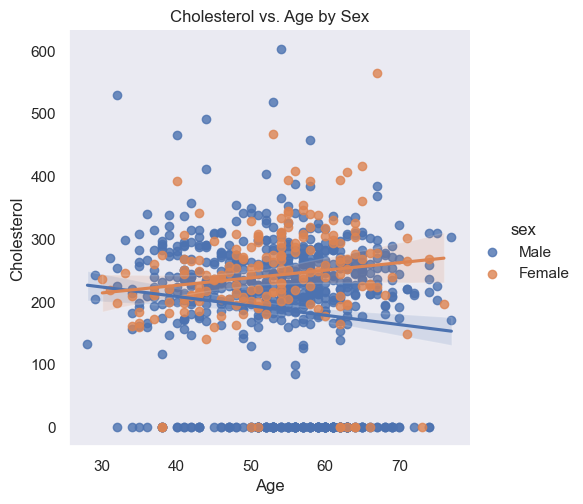

In [ ]:
# Create a regression plot using hue for sex
sns.lmplot(data=df, x="age", y="chol", hue="sex")
plt.title('Cholesterol vs. Age by Sex')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.grid(False)
plt.show()

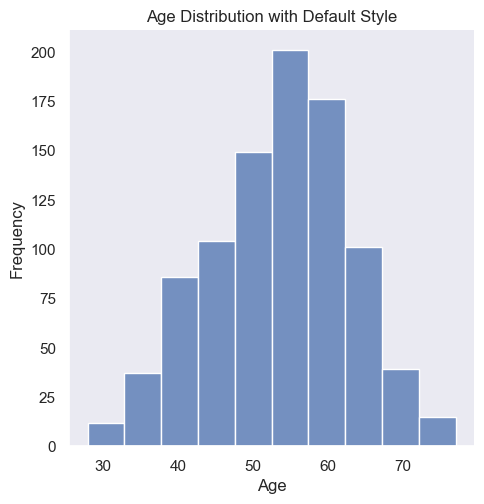

In [ ]:
# Set the default seaborn style
sns.set()
# sns.set_style('white') # darkgrid, whitegrid, dark, white, and ticks

# Plot the pandas histogram again
sns.displot(df['age'], bins=10)
plt.title('Age Distribution with Default Style')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

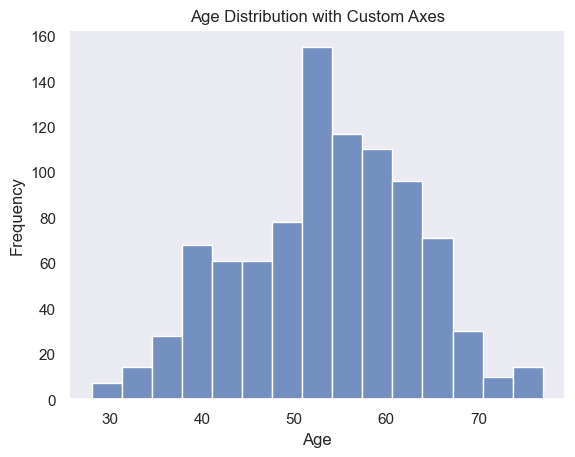

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of age
sns.histplot(df['age'], ax=ax, bins=15) # kde = True 

# Create a more descriptive x axis label
ax.set(xlabel="Age", ylabel="Frequency", title="Age Distribution with Custom Axes")
# Show the plot
plt.grid(False)
plt.show()

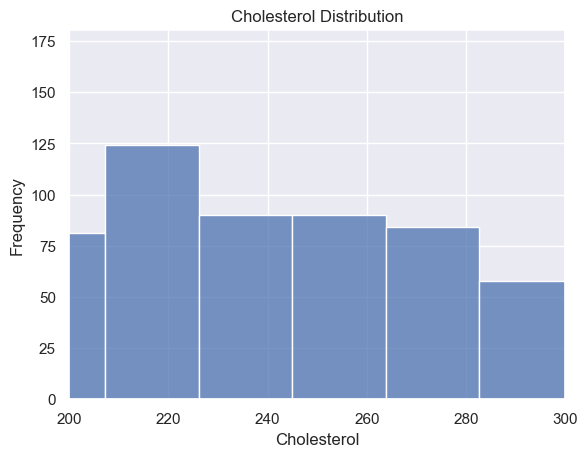

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of cholesterol
sns.histplot(df['chol'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="Cholesterol", ylabel="Frequency", title="Cholesterol Distribution", xlim=(200, 300)) # xlim()

# Display the plot
plt.show()

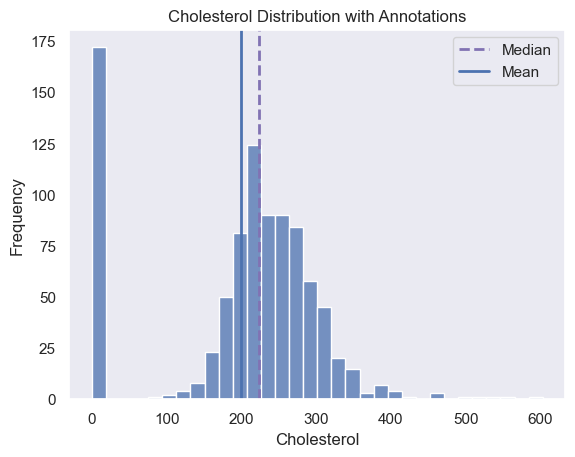

In [ ]:
# Create a figure and axes. Then plot the data
fig, ax = plt.subplots()
sns.histplot(df['chol'], ax=ax)

# Customize the labels and limits
ax.set(xlabel="Cholesterol", ylabel="Frequency", title="Cholesterol Distribution with Annotations")

# Add vertical lines for the median and mean
ax.axvline(x=df["chol"].median(), color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=df["chol"].mean(), color='b', label='Mean', linestyle='-', linewidth=2)

# Show the legend and plot the data
ax.legend()
plt.grid(False)
plt.show()

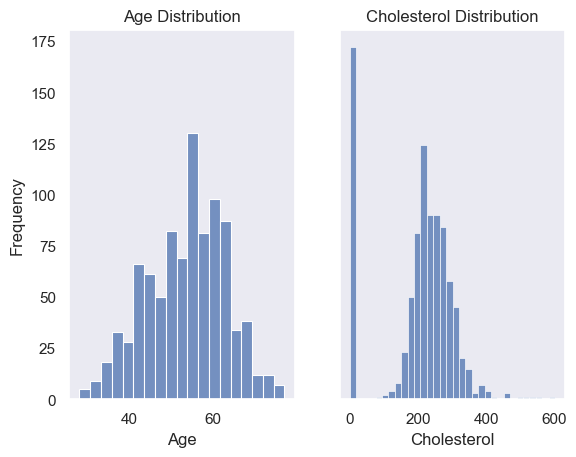

In [ ]:
# Create a plot with 1 row and 2 columns that share the y axis label
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True) 

# Plot the distribution of age on ax0
sns.histplot(df['age'], ax=ax[0])
ax[0].set(xlabel="Age", ylabel="Frequency", title="Age Distribution")

# Plot the distribution of cholesterol on ax1
sns.histplot(df['chol'], ax=ax[1])
ax[1].set(xlabel="Cholesterol", title="Cholesterol Distribution")

# remove grid for both plots 
ax[0].grid(False)
ax[1].grid(False)

# Display the plot
plt.show()

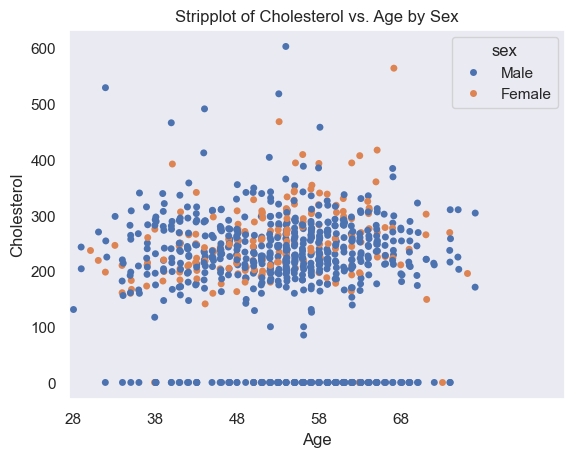

In [ ]:
# Create and display a stripplot with hue set to sex
sns.stripplot(data=df, x='age', y='chol', hue='sex')
plt.title('Stripplot of Cholesterol vs. Age by Sex')
plt.xlabel('Age')
plt.ylabel('Cholesterol')

# Set fewer x-ticks
plt.xticks(ticks=range(0, 68, 10))
plt.grid(False)
plt.show()

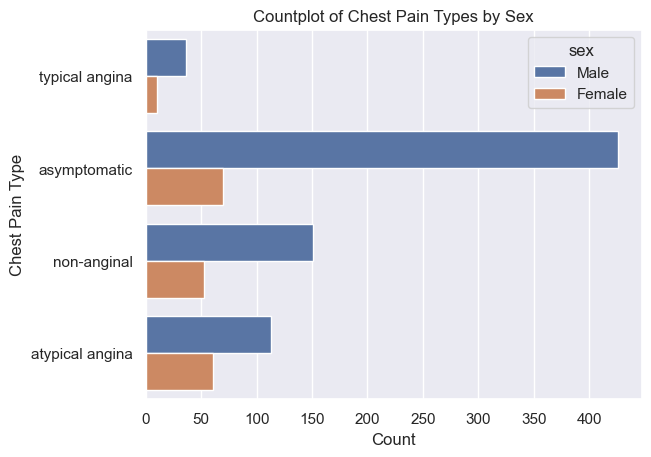

In [ ]:
# Show a countplot with the number of chest pain types used with each sex a different color
sns.countplot(data=df, y="cp", hue="sex")
plt.title('Countplot of Chest Pain Types by Sex')
plt.xlabel('Count')
plt.ylabel('Chest Pain Type')
plt.show()

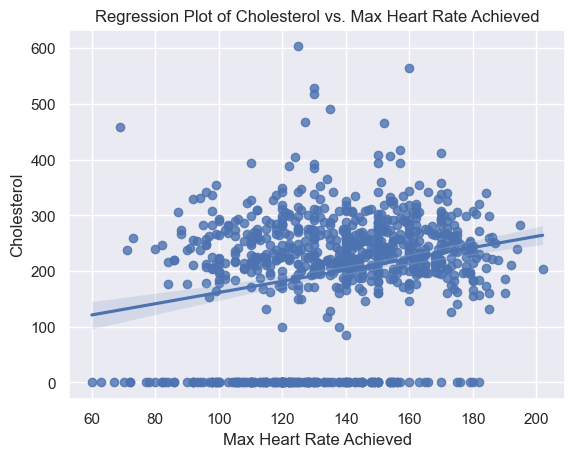

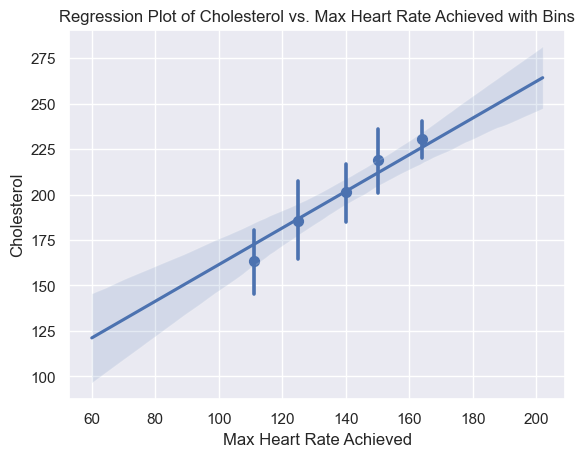

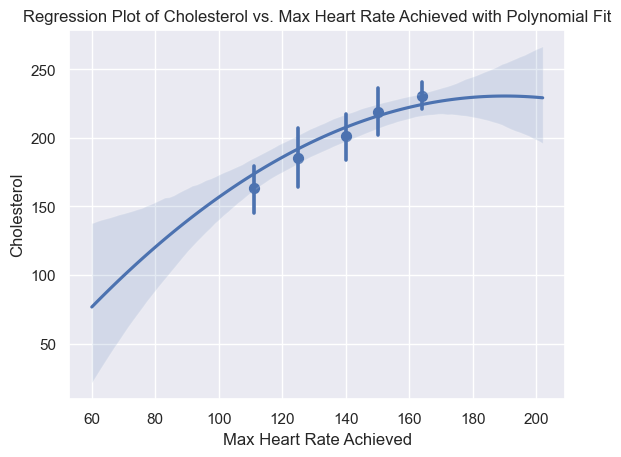

In [ ]:
# Plot a regression plot of cholesterol and the percentage of maximum heart rate achieved
sns.regplot(data=df, y='chol', x='thalch')
plt.title('Regression Plot of Cholesterol vs. Max Heart Rate Achieved')
plt.xlabel('Max Heart Rate Achieved')
plt.ylabel('Cholesterol')
plt.show()

# Create another plot that estimates the cholesterol by max heart rate achieved
sns.regplot(data=df, y='chol', x='thalch', x_bins=5)
plt.title('Regression Plot of Cholesterol vs. Max Heart Rate Achieved with Bins')
plt.xlabel('Max Heart Rate Achieved')
plt.ylabel('Cholesterol')
plt.show()

# The final plot should include a line using a 2nd order polynomial
sns.regplot(data=df, y='chol', x='thalch', x_bins=5, order=2)
plt.title('Regression Plot of Cholesterol vs. Max Heart Rate Achieved with Polynomial Fit')
plt.xlabel('Max Heart Rate Achieved')
plt.ylabel('Cholesterol')
plt.show()

A pair plot is used to visualize pairwise relationships in the dataset. The hue='sex' argument colors the points by sex.

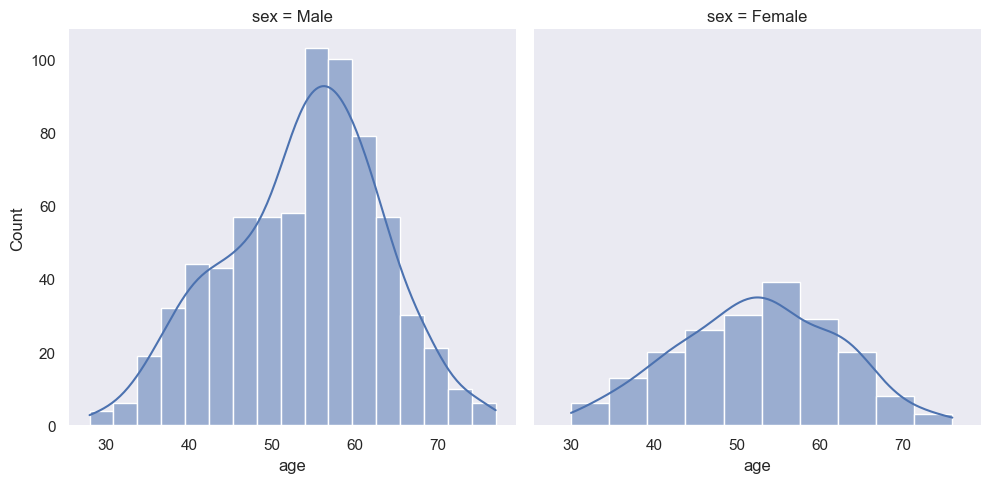

In [ ]:
# FacetGrid
g = sns.FacetGrid(df, col="sex", height=5, aspect=1)
g.map(sns.histplot, "age", kde=True)
g.add_legend()
g.despine(left=True, bottom=True)
for ax in g.axes.flat:
    ax.grid(False)
plt.show()

FacetGrid is used to create a grid of plots based on a categorical variable. In this case, it creates separate histograms for males and females.

<Figure size 640x480 with 0 Axes>

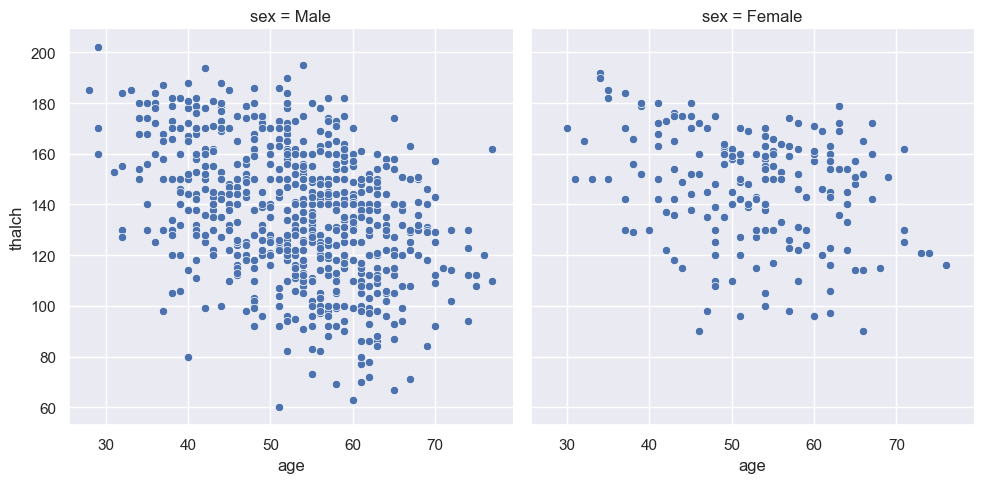

In [ ]:
# Subplots by Sex:
plt.figure()
sns.relplot(data=df, x="age", y="thalch", col="sex", kind="scatter")
plt.show()

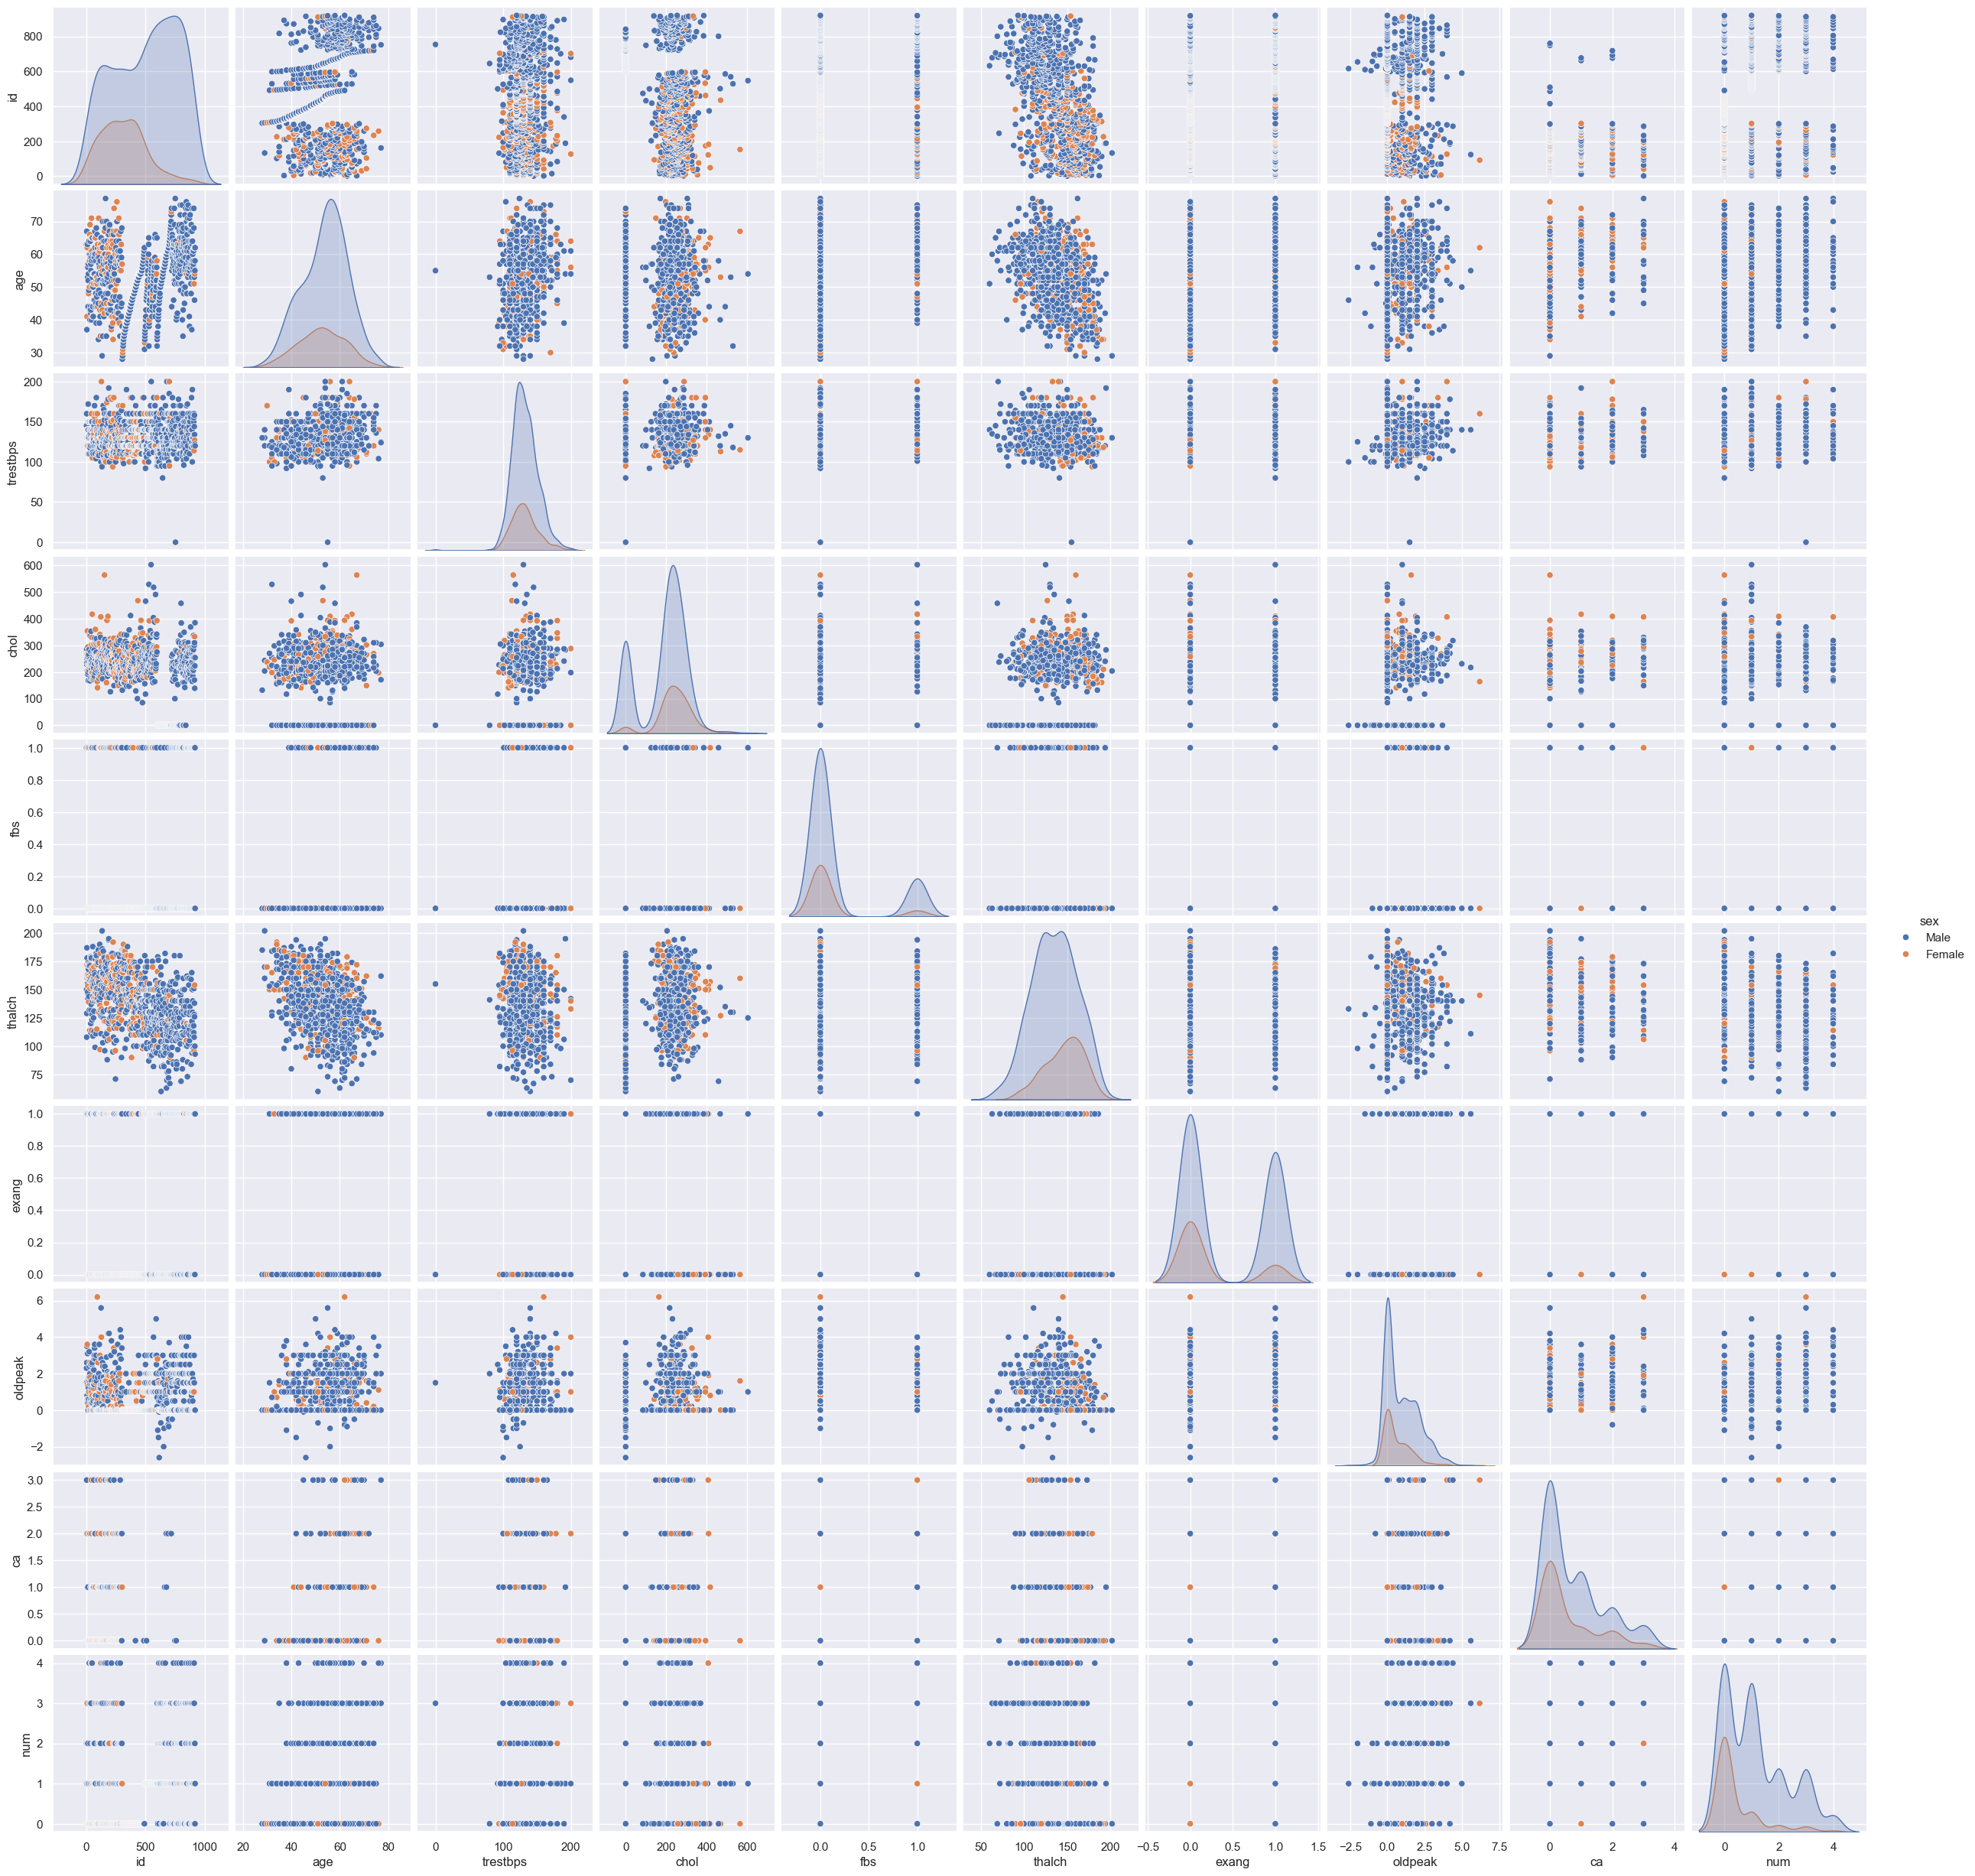

In [ ]:
# Pair plot
sns.pairplot(df, hue="sex")
plt.show()

# Introduction to NumPy: The Foundation for Efficient Array Operations

NumPy is a powerful Python package that serves as the fundamental building block for a wide range of scientific computing and data analysis tasks. Its name stands for "Numerical Python," reflecting its ability to efficiently handle numerical data.

At its core, NumPy provides a high-performance multidimensional array object, ndarray, which enables you to store and manipulate large amounts of homogeneous data efficiently. This array data structure is essential for many other popular Python packages used in data science and machine learning, such as pandas, scikit-learn, and TensorFlow.

One of the key advantages of NumPy lies in its efficient implementation. The underlying array operations are written in C, making them considerably faster than equivalent operations implemented in pure Python. This performance boost is crucial when dealing with large datasets, complex mathematical computations, or time-sensitive applications.

A central concept in NumPy is the ability to vectorize operations, which allows you to perform mathematical operations on entire arrays rather than iterating through each element individually. By leveraging this feature, you can write concise and expressive code, often eliminating the need for explicit loops. This not only simplifies the code but also significantly improves execution speed.

NumPy offers a comprehensive suite of functions for mathematical operations, random number generation, linear algebra, Fourier transformations, and more. Additionally, it provides tools for reading and writing array data to disk, enabling seamless integration with various file formats.

In this practical course, we will delve into the essential functionalities of NumPy, exploring its powerful array manipulation capabilities, mathematical functions, and data analysis techniques. By the end of the course, you will have a solid foundation in NumPy, allowing you to efficiently work with numerical data and pave the way for advanced data science tasks.

Let's embark on this exciting journey of scientific computing with NumPy!

*Generated with ChatGTPv3.5 May 24th Version, prompt: "Hi, buddy. I am helping with some practical courses in python using a Jupyter notebook in a summer school. I need to generate some introductory text about numpy, a python package. I want to remark that is the base for much other python packages, that is efficient because of its implementation and that allows to vectorize operations."*

In [ ]:
# First of all, we need to load the package. BE SURE TO HAVE IT INSTALLED!
import numpy as np

<h2> Data types </h2>

NumPy, the numerical computing package for Python, offers a rich set of objects and data types that are essential for efficient array manipulation and scientific computing. Let's take a brief look at some of the key components:

1. **ndarray (N-dimensional Array):** The `ndarray` is the fundamental object in NumPy, providing a powerful data structure to represent homogeneous, multi-dimensional arrays. It enables efficient storage and manipulation of numerical data, supporting various mathematical and logical operations. With NumPy's ndarray, you can effortlessly handle large datasets and perform vectorized computations.

2. **Scalars:** NumPy introduces scalar data types that extend beyond Python's built-in types. These include integers (`int`), floating-point numbers (`float`), complex numbers (`complex`), and boolean values (`bool`). NumPy's scalars offer increased precision and optimized memory utilization compared to the standard Python equivalents.

3. **Data Type Objects (dtype):** NumPy introduces its own data type objects, allowing you to define the precise characteristics of elements within arrays. These dtype objects specify the size, byte order, and data format of the elements. By utilizing specific dtypes, you can ensure the desired level of precision and control over memory allocation.

4. **Structured Arrays:** NumPy provides the ability to create structured arrays, where each element can be a composite of multiple fields or attributes. This feature is particularly useful when working with structured data, such as CSV files, where elements may have different data types and sizes. Structured arrays enable efficient handling of heterogeneous data in a tabular format.

5. **Universal Functions (ufuncs):** NumPy's ufuncs are functions that operate element-wise on ndarrays, enabling efficient and fast mathematical operations. These functions are highly optimized and implemented in compiled C code, providing significant performance advantages over equivalent Python loops. Ufuncs cover a wide range of mathematical operations, including arithmetic, trigonometry, exponential functions, and more.

NumPy's rich collection of objects and data types forms the backbone of scientific computing in Python. By leveraging these powerful tools, you can efficiently work with arrays, perform complex calculations, handle structured data, and manipulate numerical data with ease.

*Generated with ChatGTPv3.5 May 24th Version, prompt: "Hi, buddy! Now I will like you to generate a short review of the objects and data types of numpy. Could you please format it for markdown?"*

### 1) ndarray (N-dimensional Array) and 2) Scalars 3) Data Type Objects (dtype)

#### 1D arrays

Similarly to a list, a 1D array is a sequence of elements. All elements in a numpy array are of the same data type. We can define the precision in bytes of the elements 

In [ ]:
int_array_1 = np.array([3,4,5,6,7], np.int16)
print(int_array_1.dtype)

int16


In [ ]:
int_array_2 = np.array([11,13,2,1], np.int32)
print(int_array_2.dtype)

int32


In [ ]:
int_array_3 = np.array([11,13,2,1], np.int64)
print(int_array_3.dtype)

int64


In [ ]:
my_int_array = np.array([3,4,5,6,7,8,9], np.uint8)
print(my_int_array.dtype)

uint8


Let's look into this data type:

- `int64` is a 64-bit signed integer, equivalent to the basic scalar type `int` in numpy (`dtype=int` in NumPy, it is equivalent to `dtype=np.int64`), allowing for larger integer values. It has a wider range, enabling the representation of integers from approximately -9 quintillion to +9 quintillion. It uses 8 bytes of memory per element.

There are other data types that you can use, such as `int32`:


- `int32` (in fact, the built-in `int` type in basic Python is equivalent to this dtype) is a 32-bit signed integer, capable of representing integers in the range from approximately -2 billion to +2 billion. It uses 4 bytes of memory per element.

The choice between `int32` and `int64` depends on the range of values you need to represent, with `int32` being suitable for smaller integers and `int64` necessary for larger ones or precise calculations.


*Modified from ChatGTPv3.5 May 24th Version, prompt: "Could you please give me a short explanation between int32 and int64 and between float32 and float64 data types? Could you please format it for markdown?"*

In [ ]:
float_array_1 = np.array([2.3, 4.3, 1.3], dtype=np.float16)
print(float_array_1.dtype)

float16


In [ ]:
float_array_2 = np.array([2.3, 4.3, 1.3], dtype=np.float32)
print(float_array_2.dtype)

float32


In [ ]:
my_float_array = np.array([32.3,43.1,9])
print(my_float_array.dtype)

float64


`float16`, `float32` and `float64` are floating-point data types used to represent decimal numbers with fractional parts.

 - `float16` is a 16-bit floating-point number, utilizing 2 bytes of memory per element. It provides lower precision compared to `float32` and `float64`, with approximately 3-4 decimal digits of precision. `float16` is commonly used in scenarios where memory usage is critical, such as on resource-constrained devices or when dealing with large datasets.
 

 - `float32` (or `float` in Python) is a 32-bit floating-point number, utilizing 4 bytes of memory per element. It provides approximately 7 decimal digits of precision.
 
  
 - `float64` is a 64-bit floating-point number, utilizing 8 bytes of memory per element. It offers higher precision and can represent decimal numbers with approximately 15 decimal digits of precision.
  
The choice between `float32` and `float64` depends on the required precision of your calculations. `float64` is generally recommended for more accurate and precise calculations in scientific or financial applications, while `float32` suffices for many general-purpose applications, consuming less memory. When working with numerical data, it is crucial to select the appropriate data type based on the desired range and precision of the values to ensure accurate computations while managing memory efficiently.

*Modified from ChatGTPv3.5 May 24th Version, prompt: "Could you please give me a short explanation between int32 and int64 and between float32 and float64 data types? Could you please format it for markdown?"*

<h4> Indexing and slicing </h4>
To access elements inside a numpy array we use indexing:

In [ ]:
print(my_int_array)
print(my_int_array[0])
print(my_int_array[2])
print(my_int_array[-1])
print(my_int_array[-3])

[3 4 5 6 7 8 9]
3
5
9
7


To access multiple elements at a time we use slicing:

In [ ]:
print(my_int_array)
print(my_int_array[2:4])
print(my_int_array[1:5])
print(my_int_array[:4])
print(my_int_array[2:])
print(my_int_array[-3:])

[3 4 5 6 7 8 9]
[5 6]
[4 5 6 7]
[3 4 5 6]
[5 6 7 8 9]
[7 8 9]


We can redefine an element in an array by selecting its index and assigning it to a new value:

In [ ]:
new_array = np.array([3,4,5,6,7,8,9], np.float32)
print(new_array)
new_array[3] = 11
print('modify 4th element')
print(new_array)

[3. 4. 5. 6. 7. 8. 9.]
modify 4th element
[ 3.  4.  5. 11.  7.  8.  9.]


Similarly, with multiple indices:

In [ ]:
new_array[-3:] = [12,13,14]
new_array = np.delete(new_array, 4)
print(new_array)

[ 3.  4.  5. 11. 13. 14.]


<h4>Multi-dimensional arrays</h4>

In [ ]:
my_matrix = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(my_matrix)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


We use multiple indices to access elements of multidimensional arrays. In the case of a 2D matrix, the first index refers to the row index, while the second one is for the columns:

In [ ]:
print(my_matrix[1,2])
print(my_matrix[-1,-1])

6
12


If we use only one index we can select entire rows:

In [ ]:
print(my_matrix[0])
print(my_matrix[1:3])

[1 2 3]
[[4 5 6]
 [7 8 9]]


If we want to select an entire column:

In [ ]:
print(my_matrix[:,2])

[ 3  6  9 12]


Similarly, for 3 dimensional arrays:

In [ ]:
multidim_array = np.array([
    [[3,4,2],[5,4,4]],
    [[7,8,7],[6,6,6]]
])

Now our array consists of 2 2x3 matrices. This means that element at index 0 is the first 2x3 matrix, and element at index 1 is the second 2x3 matrix. We can then access the elements of the matrix as before:

In [ ]:
multidim_array.shape

(2, 2, 3)

In [ ]:
print(multidim_array)
print('')
print(multidim_array[0])
print(multidim_array[0].shape)
print('')
print(multidim_array[0,:,1])
print(multidim_array[1,-1])

[[[3 4 2]
  [5 4 4]]

 [[7 8 7]
  [6 6 6]]]

[[3 4 2]
 [5 4 4]]
(2, 3)

[4 4]
[6 6 6]


<h4>Dimensions</h4>

A convenient way to keep track of the operations that we perform is to check the dimension of input, intermediate or output arrays. Numpy provides an easy way to see the shape of an array:

In [ ]:
my_matrix.shape

(4, 3)

In [ ]:
multidim_array.shape

(2, 2, 3)

To look at the number of dimensions:

In [ ]:
my_matrix.ndim

2

In [ ]:
multidim_array.ndim

3

In [ ]:
my_int_array.ndim

1

<h4>Zeros, ones, arange</h4>

With numpy we can easily create arrays of zeros, ones and evenly spaced values:

In [ ]:
array_zeros = np.zeros(10)
print(array_zeros)
matrix_zeros = np.zeros((5,5))
matrix_zeros

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
array_ones = np.ones(10)
print(array_ones)
matrix_ones = np.ones((5,5))
matrix_ones

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(4,10)

array([4, 5, 6, 7, 8, 9])

In [ ]:
np.arange(4,10,2)

array([4, 6, 8])

The third argument in `np.arange` is the step size.

<h4> Reshape </h4>

In [ ]:
# We can define a 1-dimension array of low precision floats FROM 0 to 1.4 by 0.2 steps
unidim_array = np.arange(0, 1.6, 0.2, dtype='float16')
unidim_array

array([0.    , 0.2   , 0.4   , 0.5996, 0.8   , 1.    , 1.199 , 1.399 ],
      dtype=float16)

In [ ]:
# 2D 8x1 array
np.reshape(unidim_array, (8,1))

array([[0.    ],
       [0.2   ],
       [0.4   ],
       [0.5996],
       [0.8   ],
       [1.    ],
       [1.199 ],
       [1.399 ]], dtype=float16)

In [ ]:
# 2D 1x8 array
np.reshape(unidim_array, (1,8))

array([[0.    , 0.2   , 0.4   , 0.5996, 0.8   , 1.    , 1.199 , 1.399 ]],
      dtype=float16)

In [ ]:
# 2D 2x4 array
np.reshape(unidim_array, (2,4))

array([[0.    , 0.2   , 0.4   , 0.5996],
       [0.8   , 1.    , 1.199 , 1.399 ]], dtype=float16)

In [ ]:
# 2D 2x2x2 array
np.reshape(unidim_array, (2,2,2))

array([[[0.    , 0.2   ],
        [0.4   , 0.5996]],

       [[0.8   , 1.    ],
        [1.199 , 1.399 ]]], dtype=float16)

### 4) Structured arrays

In [ ]:
# Define the data types for the structured array
dt = np.dtype([('name', np.str_, 20), ('age', np.int32), ('score', np.float64)])

# Create a structured array
data = np.array([('John', 25, 85.5), ('Alice', 30, 92.3), ('Bob', 28, 77.8)], dtype=dt)
print(data)

[('John', 25, 85.5) ('Alice', 30, 92.3) ('Bob', 28, 77.8)]


In [ ]:
# Access and print specific fields of the structured array
print("Name:", data['name'])
print("Age:", data['age'])
print("Score:", data['score'])

Name: ['John' 'Alice' 'Bob']
Age: [25 30 28]
Score: [85.5 92.3 77.8]


This is very useful for complex datasets, although for that it is better to use the `pandas` package which is built upon `numpy` and for a more versatile manipulation of complex datasets.

<h3>5) Universal Functions (ufuncs)</h3>

#### a) Basic numpy functions

In [ ]:
# Create a sample array
arr = np.array([23, 56, 12, 90, 45, 78, 34])

# Find the minimum value in the array
min_value = np.min(arr)
print("Minimum Value:", min_value)

# Find the maximum value in the array
max_value = np.max(arr)
print("Maximum Value:", max_value)

# Calculate the mean of the array
mean_value = np.mean(arr)
print("Mean:", mean_value)

# Calculate the standard deviation of the array
std_value = np.std(arr)
print("Standard Deviation:", std_value)

# Calculate the variance of the array
var_value = np.var(arr)
print("Variance:", var_value)

Minimum Value: 12
Maximum Value: 90
Mean: 48.285714285714285
Standard Deviation: 26.331481894787277
Variance: 693.3469387755102


In [ ]:
np.max(my_matrix, axis=0)

array([10, 11, 12])

In [ ]:
my_matrix

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [ ]:
np.linalg.norm(my_matrix, axis=1)

array([ 3.74165739,  8.77496439, 13.92838828, 19.10497317])

#### b) Adding, Subtracting, Multiplying, and Dividing by a Number, using broadcasting

Broadcasting refers to how numpy treats arrays with different dimension during arithmetic operations which lead to certain constraints, the smaller array is broadcast across the larger array so that they have compatible shapes.

In [ ]:
# Create a sample array
arr = np.array([1, 2, 3, 4, 5])

# Add a number to each element
result_add = np.add(arr, 10)
print("Addition Result:", result_add)

# Subtract a number from each element
result_subtract = np.subtract(arr, 3)
print("Subtraction Result:", result_subtract)

# Multiply each element by a number
result_multiply = np.multiply(arr, 2)
print("Multiplication Result:", result_multiply)

# Divide each element by a number
result_divide = np.divide(arr, 2)
print("Division Result:", result_divide)

Addition Result: [11 12 13 14 15]
Subtraction Result: [-2 -1  0  1  2]
Multiplication Result: [ 2  4  6  8 10]
Division Result: [0.5 1.  1.5 2.  2.5]


#### c) Adding, Subtracting arrays

In [ ]:
# Just sum them up
print(arr+arr)

# Same for sustraction
print(arr-arr)

[ 2  4  6  8 10]
[0 0 0 0 0]


In [ ]:
my_new_matrix = np.arange(12).reshape(-1,3).astype(np.float64)

#### d) Multiplying Two Arrays

In [ ]:
# Create a 2D 2x3 sample array
arr1 = np.array(np.reshape(np.arange(0,6,1), (2,3)))
print(np.shape(arr1))

# Create a 2D 3x2 sample array
arr2 = np.array(np.reshape(np.arange(0,6,1), (3,2)))
print(np.shape(arr2))

# Multiply them
print(np.matmul(arr1,arr2))

# Note that the opposite gives a matrix with a different shape
print(np.matmul(arr2,arr1))

(2, 3)
(3, 2)
[[10 13]
 [28 40]]
[[ 3  4  5]
 [ 9 14 19]
 [15 24 33]]


#### e) Multiplying and dividing two arrays ELEMENT-WISE

In [ ]:
# Create two sample arrays
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = np.array([2, 4, 6, 8, 10])

# Multiply the arrays element-wise
result_multiply_arrays = np.multiply(arr1, arr2)
print("Element-wise Multiplication Result:", result_multiply_arrays)

# Divide the arrays element-wise
result_multiply_arrays = np.divide(arr1, arr2)
print("Element-wise Division Result:", result_multiply_arrays)

Element-wise Multiplication Result: [ 2  8 18 32 50]
Element-wise Division Result: [0.5 0.5 0.5 0.5 0.5]


#### f) Using apply_along_axis and Defining a Custom Function

In [ ]:
# Define a custom function
def custom_function_average(row):
    return np.sum(row) / len(row)

# Create a 2D array
arr_2d = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

# Apply the custom function along the rows (axis=1)
result_apply_along_axis = np.apply_along_axis(custom_function_average, axis=1, arr=arr_2d)
print("Apply along Axis Result:", result_apply_along_axis)

Apply along Axis Result: [2. 5. 8.]


<h4>Boolean arrays</h4>

Numpy arrays can also be booleans. We can use arrays as indices.

In [ ]:
my_new_matrix = np.arange(12).reshape(4,-1).astype(np.float64)

In [ ]:
my_new_matrix[my_new_matrix==0] = np.inf

In [ ]:
# Create a sample array
arr = np.array([1, 2, 3, 4, 5])

# Create a boolean mask based on a condition
mask = arr > 2

# Use the boolean mask to index the array
result = arr[mask]

# Print the result
print("Result:", result)

Result: [3 4 5]


<h4> Pandas </h4>

The two primary data structures in pandas as Series and Dataframes, which allow for efficient handling and manipulation of tabular data. Let's see how we can use pandas to load and treat data from a dataset of breast tumor cells.

In [ ]:
import pandas as pd

breast_cancer = pd.read_csv('breast_cancer.csv')

In [ ]:
breast_cancer

x.radius_mean  x.texture_mean  x.perimeter_mean  x.area_mean  \
0           13.540           14.36             87.46        566.3   
1           13.080           15.71             85.63        520.0   
2            9.504           12.44             60.34        273.9   
3           13.030           18.42             82.61        523.8   
4            8.196           16.84             51.71        201.9   
..             ...             ...               ...          ...   
564         20.920           25.09            143.00       1347.0   
565         21.560           22.39            142.00       1479.0   
566         20.130           28.25            131.20       1261.0   
567         16.600           28.08            108.30        858.1   
568         20.600           29.33            140.10       1265.0   

     x.smoothness_mean  x.compactness_mean  x.concavity_mean  \
0              0.09779             0.08129           0.06664   
1              0.10750             0.12700           0.04568   
2              0.10240             0.06492           0.02956   
3              0.08983             0.03766           0.02562   
4              0.08600             0.05943           0.01588   
..                 ...                 ...               ...   
564            0.10990             0.22360           0.31740   
565            0.11100             0.11590           0.24390   
566            0.09780             0.10340           0.14400   
567            0.08455             0.10230           0.09251   
568            0.11780             0.27700           0.35140   

     x.concave_pts_mean  x.symmetry_mean  x.fractal_dim_mean  ...  \
0              0.047810           0.1885             0.05766  ...   
1              0.031100           0.1967             0.06811  ...   
2              0.020760           0.1815             0.06905  ...   
3              0.029230           0.1467             0.05863  ...   
4              0.005917           0.1769             0.06503  ...   
..                  ...              ...                 ...  ...   
564            0.147400           0.2149             0.06879  ...   
565            0.138900           0.1726             0.05623  ...   
566            0.097910           0.1752             0.05533  ...   
567            0.053020           0.1590             0.05648  ...   
568            0.152000           0.2397             0.07016  ...   

     x.texture_worst  x.perimeter_worst  x.area_worst  x.smoothness_worst  \
0              19.26              99.70         711.2             0.14400   
1              20.49              96.09         630.5             0.13120   
2              15.66              65.13         314.9             0.13240   
3              22.81              84.46         545.9             0.09701   
4              21.96              57.26         242.2             0.12970   
..               ...                ...           ...                 ...   
564            29.41             179.10        1819.0             0.14070   
565            26.40             166.10        2027.0             0.14100   
566            38.25             155.00        1731.0             0.11660   
567            34.12             126.70        1124.0             0.11390   
568            39.42             184.60        1821.0             0.16500   

     x.compactness_worst  x.concavity_worst  x.concave_pts_worst  \
0                0.17730            0.23900              0.12880   
1                0.27760            0.18900              0.07283   
2                0.11480            0.08867              0.06227   
3                0.04619            0.04833              0.05013   
4                0.13570            0.06880              0.02564   
..                   ...                ...                  ...   
564              0.41860            0.65990              0.25420   
565              0.21130            0.41070              0.22160   
566              0.19220            0.321

Each row in the table is an observation, and each column is a characteristic. In our example, the columns are characteristics of cell nuclei in breast tumors. The last column represents the target. 'M' means that the observation corresponds to malignant tumor, while 'B' means that the tumor is benign.